### Loading Data Analytics Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

### Importing and viewing Dataset

In [2]:
## Loading the data
maternal = pd.read_csv("/Users/Dominic _Genius/Desktop/Maternal Health Risk Data Set.csv")

## viewing the data
maternal.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
## Viewing information about the data
maternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
# creating new column with name age level
## Age below 21 is set to early maternity age
## Age between 21 and 35 is set to normal maternity age
## Age above 35 is set to late maternity age

maternal['AgeLevel'] = ["early maternity age" if item <= 20 else "normal maternity age" if (item > 20)&(item <= 35) else "late maternity age" for item in maternal["Age"]]

### Data Cleaning and Transformation

In [5]:
## Removing outlier in the Heart Rate column(variable)

maternal = maternal[maternal['HeartRate'] > maternal.HeartRate.min()]

In [6]:
## Checking for null variables

maternal.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
AgeLevel       0
dtype: int64

In [7]:
## Converting temperature in Farenhiet to Celsius 

maternal['BodyTemp'] = round((5/9)*(maternal.BodyTemp - 32), 1)

##Viewing information about the data
print(maternal.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1013
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1012 non-null   int64  
 1   SystolicBP   1012 non-null   int64  
 2   DiastolicBP  1012 non-null   int64  
 3   BS           1012 non-null   float64
 4   BodyTemp     1012 non-null   float64
 5   HeartRate    1012 non-null   int64  
 6   RiskLevel    1012 non-null   object 
 7   AgeLevel     1012 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 71.2+ KB
None


### Demographic Characteristics

In [8]:
## Checking for the counts of the dependent variable

risklevel = pd.DataFrame(maternal.RiskLevel.value_counts(ascending = True))
risklevel

,RiskLevel
high risk,272
mid risk,336
low risk,404


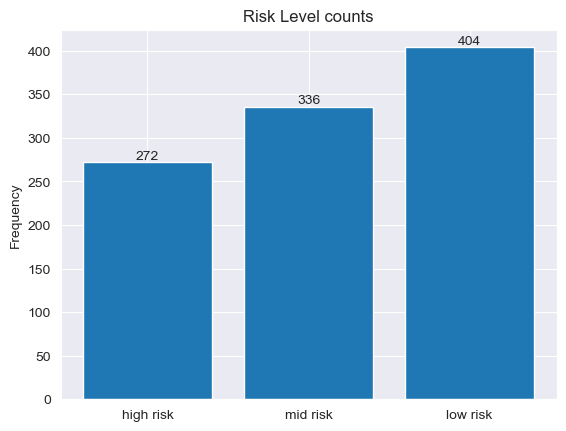

In [9]:
# Bar Graph for the counts of Risk Level classes

sns.set_style(style = 'darkgrid')
riskbar = plt.bar(x = risklevel.index, height = risklevel.RiskLevel)
plt.bar_label(riskbar, labels = risklevel.RiskLevel )
plt.title("Risk Level counts")
plt.ylabel("Frequency")
plt.savefig(fname = "Barplot for risk", format = "jpeg")
plt.show()

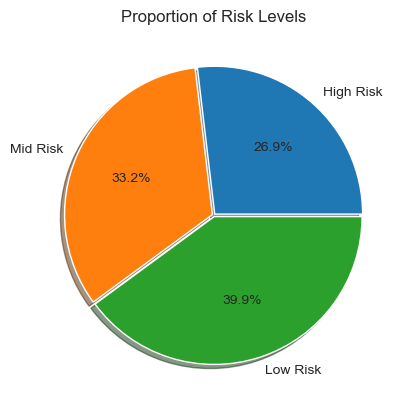

In [10]:
# Pie Chart for proportion of Risk Level classes


plt.pie(risklevel.RiskLevel, autopct = '%0.1f%%', labels = ['High Risk','Mid Risk','Low Risk'], shadow = True, explode = [0.01,0.01,0.01])
plt.title('Proportion of Risk Levels')
plt.savefig(fname = 'pie chart for risk', format = 'jpeg')
plt.show()

In [11]:
## Checking for counts of Age categories(classes or levels)

agelevel = pd.DataFrame(maternal.AgeLevel.value_counts(ascending = True))
agelevel

,AgeLevel
late maternity age,268
early maternity age,299
normal maternity age,445


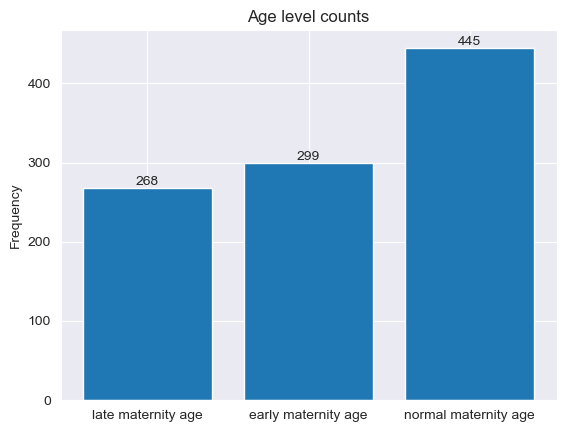

In [12]:
# Bar Graph for Counts of Age Levels

sns.set_style(style = 'darkgrid')
agebar = plt.bar(x = agelevel.index, height = agelevel.AgeLevel)
plt.bar_label(agebar, labels = agelevel.AgeLevel )
plt.title("Age level counts")
plt.ylabel("Frequency")
plt.savefig(fname = "Barplot for Age", format = "jpeg")
plt.show()

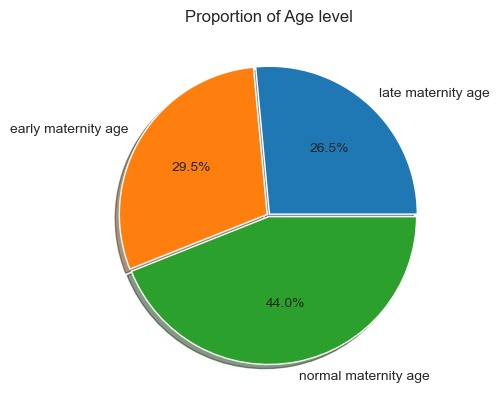

In [13]:
# Pie Chart for proportion of Age Level

plt.pie(agelevel.AgeLevel, autopct = '%0.1f%%', labels = agelevel.index, shadow = True, explode = [0.01,0.01,0.01])
plt.title('Proportion of Age level')
plt.savefig(fname = 'pie chart for age', format = 'jpeg')
plt.show()

### Descriptive Statistics

In [14]:
round(maternal.describe(), 1)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0
mean,29.9,113.2,76.5,8.7,37.1,74.4
std,13.5,18.4,13.9,3.3,0.7,7.5
min,10.0,70.0,49.0,6.0,36.7,60.0
25%,19.0,100.0,65.0,6.9,36.7,70.0
50%,26.0,120.0,80.0,7.5,36.7,76.0
75%,39.0,120.0,90.0,8.0,36.7,80.0
max,70.0,160.0,100.0,19.0,39.4,90.0


In [15]:
## Descriptive Analysis for each of the classes of the dependent variable

maternal.groupby('RiskLevel').describe().transpose()

RiskLevel           high risk    low risk    mid risk
Age         count  272.000000  404.000000  336.000000
            mean    36.216912   26.923267   28.363095
            std     13.032206   13.131764   12.552660
            min     12.000000   10.000000   10.000000
            25%     25.000000   17.750000   19.000000
            50%     35.000000   22.000000   25.000000
            75%     48.000000   32.000000   32.000000
            max     65.000000   70.000000   60.000000
SystolicBP  count  272.000000  404.000000  336.000000
            mean   124.194853  105.797030  113.154762
            std     20.227185   15.902101   14.983170
            min     83.000000   70.000000   70.000000
            25%    120.000000   90.000000  100.000000
            50%    130.000000  120.000000  120.000000
            75%    140.000000  120.000000  120.000000
            max    160.000000  129.000000  140.000000
DiastolicBP count  272.000000  404.000000  336.000000
            mean    85.073529   72.522277   74.232143
            std     14.112428   13.085404   11.490151
            min     60.000000   49.000000   50.000000
            25%     75.000000   60.000000   65.000000
            50%     90.000000   75.000000   75.000000
            75%    100.000000   80.000000   80.000000
            max    100.000000  100.000000  100.000000
BS          count  272.000000  404.000000  336.000000
            mean    12.122610    7.216906    7.795744
            std      4.173525    0.645413    2.285511
            min      6.100000    6.000000    6.000000
            25%      7.900000    6.900000    6.800000
            50%     11.000000    7.500000    7.000000
            75%     15.000000    7.500000    7.800000
            max     19.000000   11.000000   18.000000
BodyTemp    count  272.000000  404.000000  336.000000
            mean    37.186765   36.900743   37.150298
            std      0.846029    0.604224    0.776521
            min     36.700000   36.700000   36.700000
            25%     36.700000   36.700000   36.700000
            50%     36.700000   36.700000   36.700000
            75%     37.800000   36.700000   37.800000
            max     39.400000   39.400000   39.400000
HeartRate   count  272.000000  404.000000  336.000000
            mean    76.742647   73.096535   74.175595
            std      8.697878    6.895396    6.767490
            min     60.000000   60.000000   60.000000
            25%     70.000000   70.000000   70.000000
            50%     77.000000   70.000000   76.000000
            75%     86.000000   77.000000   78.000000
            max     90.000000   88.000000   88.000000

## Data Preprocessing

#### Importing preprocessing Libraries

In [16]:
## LabelEncoder for encoding categorical variables
## StandardScaler for standardizing the data

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#### Encoding Categorical features

In [17]:
## Encoding the classes of the Risk Levels

encoder = LabelEncoder()

maternal['Risk_Status'] = encoder.fit_transform(maternal.RiskLevel)
maternal.groupby('RiskLevel')['Risk_Status'].unique()

RiskLevel
high risk    [0]
low risk     [1]
mid risk     [2]
Name: Risk_Status, dtype: object

In [18]:
## Re-encoding the classes because they are not in the prefered order
## We want to set High Risk to 2, Mid-Risk to 1 and Low-Risk to 0

maternal['Risk_Status'] = [2 if level == "high risk" else 1 if level == "mid risk" else 0 for level in maternal.RiskLevel]

maternal.groupby('RiskLevel')['Risk_Status'].unique()

RiskLevel
high risk    [2]
low risk     [0]
mid risk     [1]
Name: Risk_Status, dtype: object

### Exploratory Analysis

#### Histogram plots to explore the Distributions of all variables (columns)

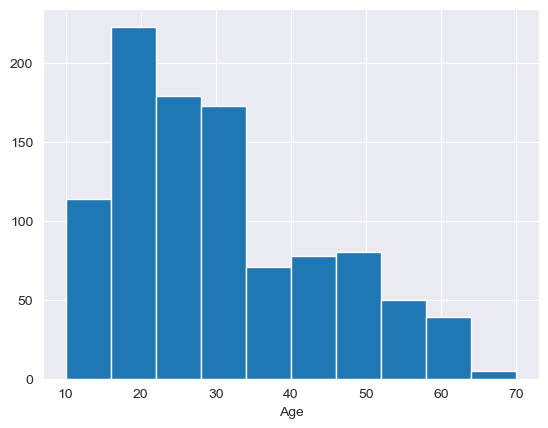

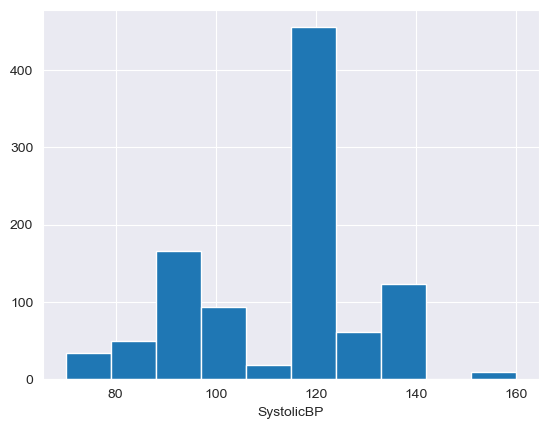

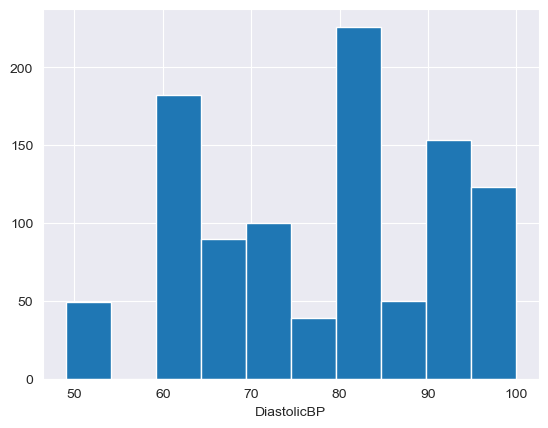

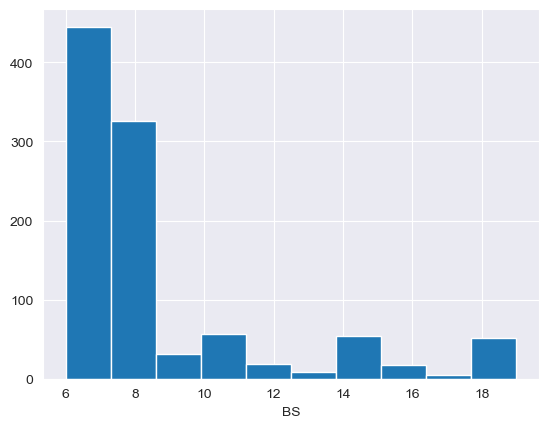

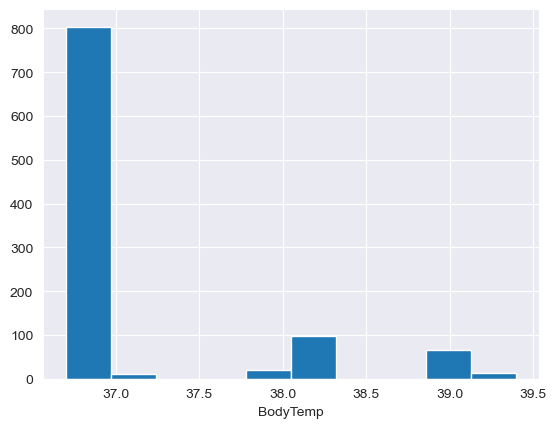

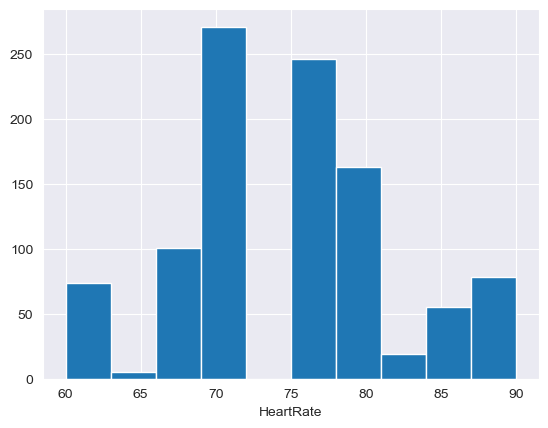

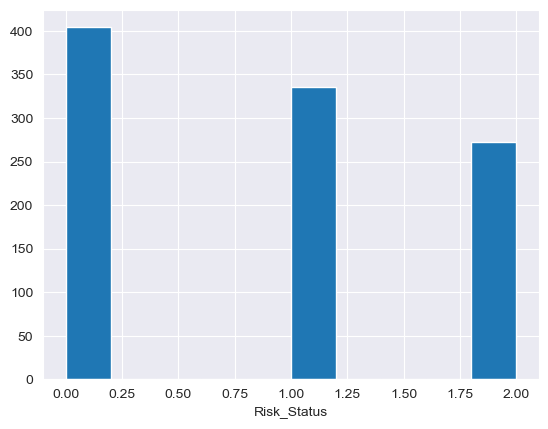

In [19]:
for item in maternal.drop(['RiskLevel','AgeLevel'], axis = 1).columns:
    plt.hist(maternal[item])
    plt.xlabel(str(item))
    plt.savefig(fname = str('Histogram for '+item), format = 'jpeg')
    plt.show()
    print('='*90, '\n')

#### Correlation Analysis to explore relationships

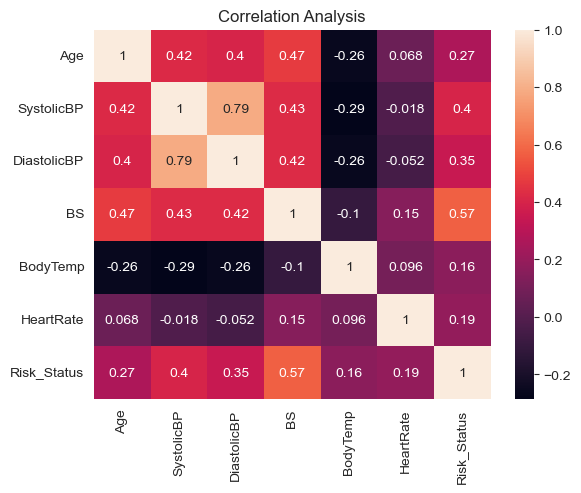

In [20]:
sns.heatmap(maternal.drop(['RiskLevel'], axis = 1).corr(method = "pearson"), annot = True)
plt.title("Correlation Analysis")
plt.savefig(fname = "Correlation Matrix", format = 'jpeg')
plt.show()

# Machine Learning

### Loading Machine Learning Libraries

In [21]:
# for training and test data
from sklearn.model_selection import train_test_split


# for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# for machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

## Do pip install xgboost, lightgbm, catboost before running this code
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

##### Scaling the Data

In [22]:
## Standardizing the data using Z-score standardization

scaler = StandardScaler()

x = scaler.fit_transform(maternal.drop(['RiskLevel', 'Risk_Status' , 'AgeLevel'], axis = 1))
y = maternal.Risk_Status

### ScatterMatrix for all variables

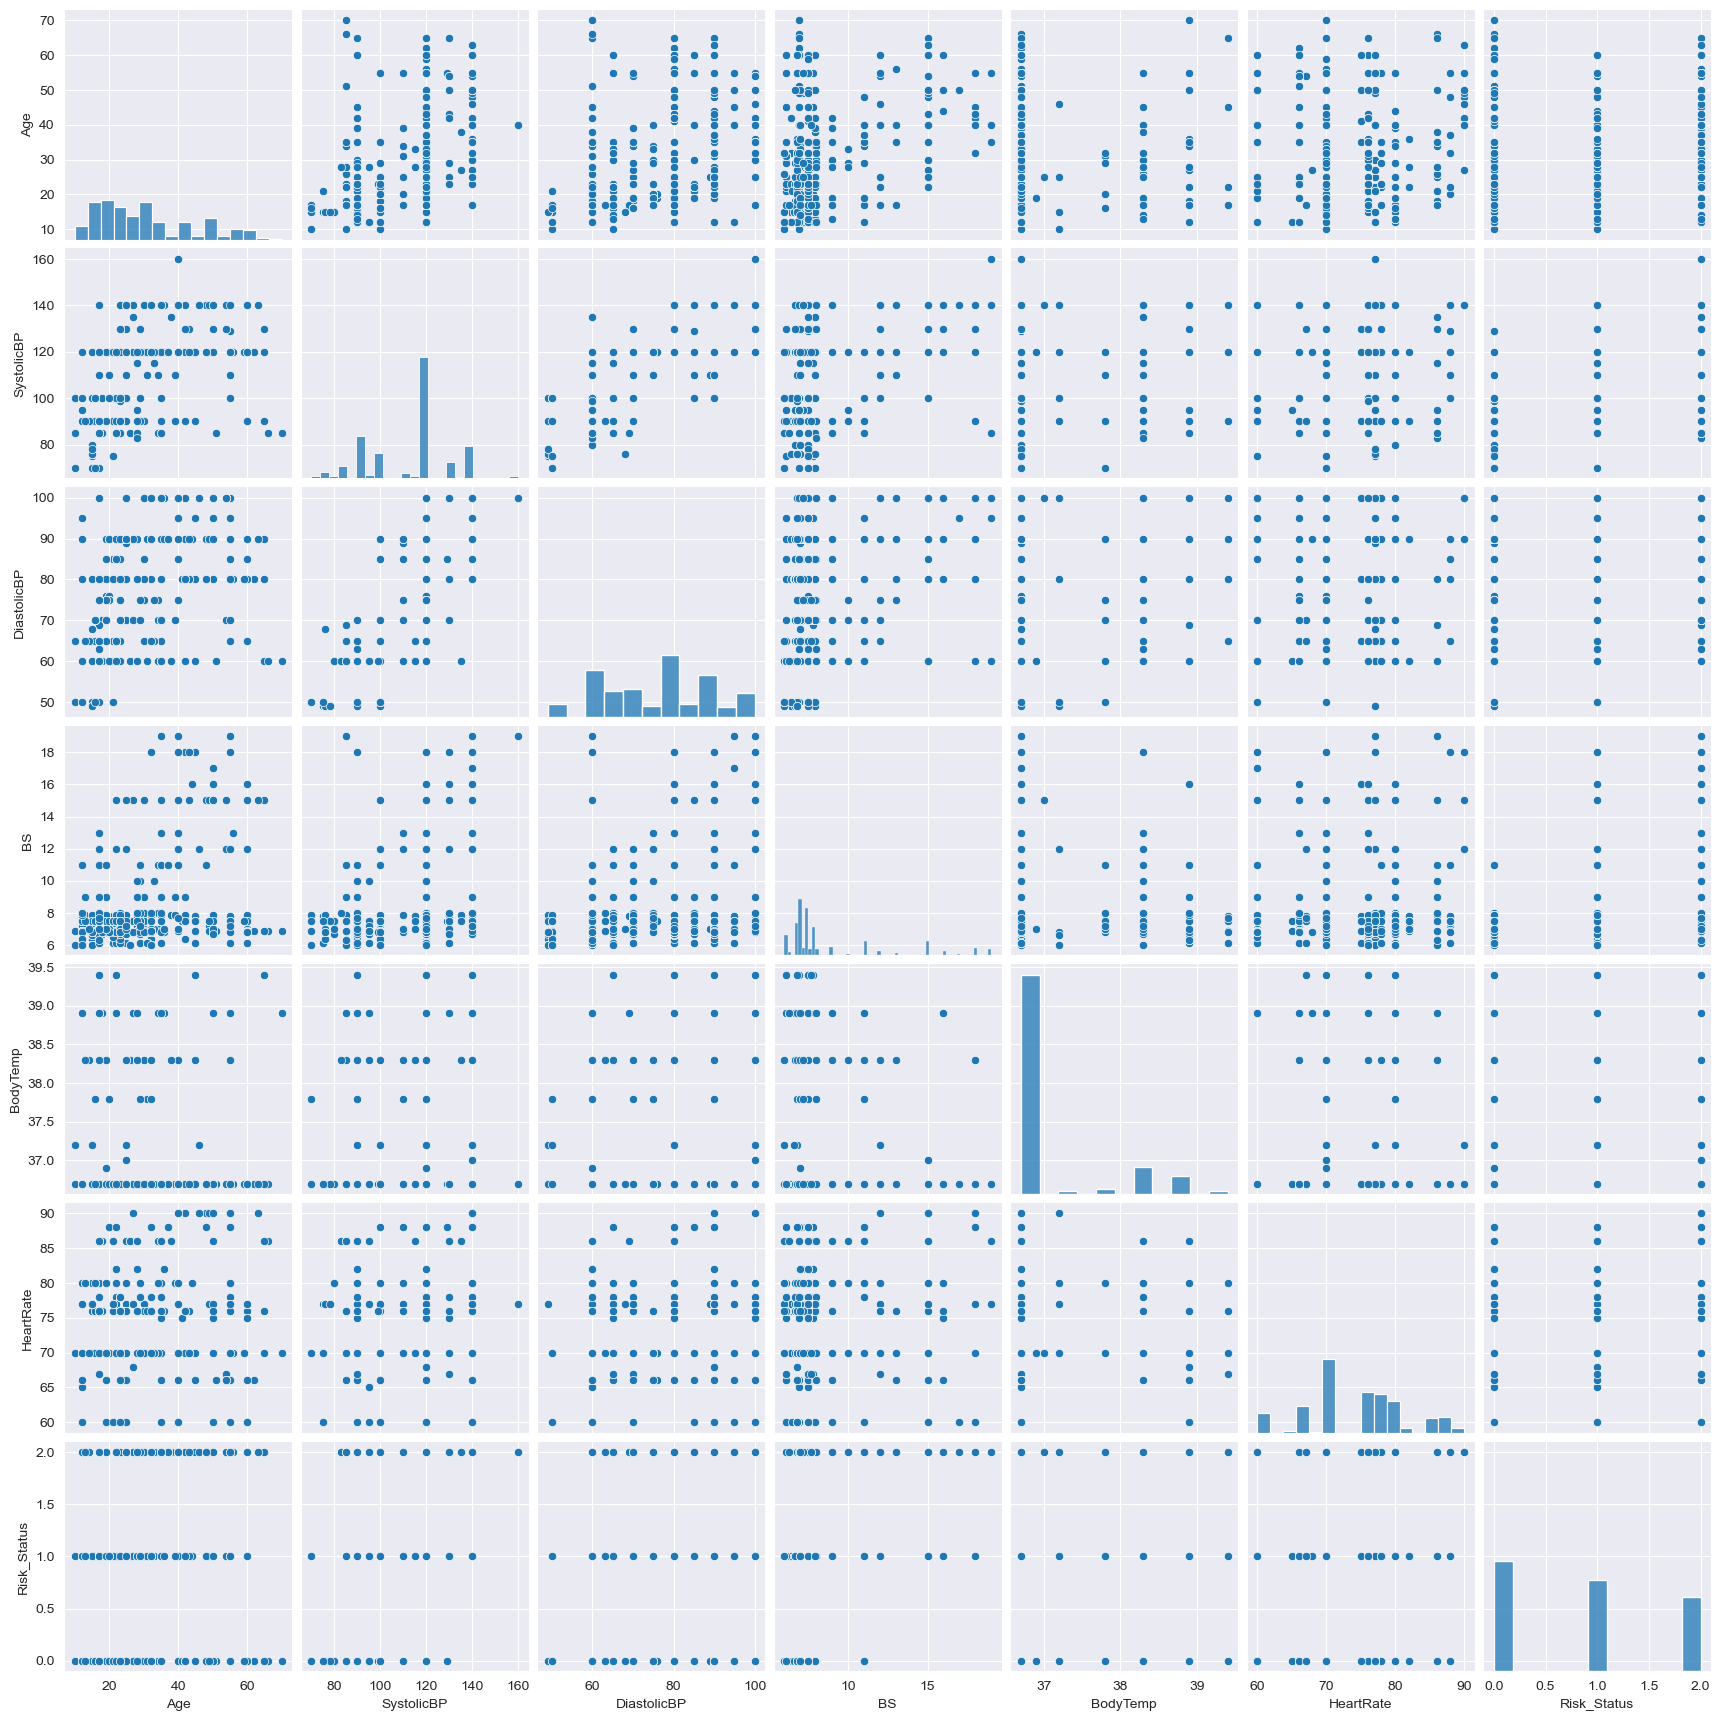

In [23]:
sns.pairplot(maternal)
plt.savefig(fname = 'Scatterplot for all variables', format = 'jpeg')
plt.show()

### Training and Test Data

In [24]:
## splitting the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y,  random_state = 123 )

In [25]:
## Checking the ratio of the split

print('Train size : ', len(x_train),'\nTest Size : ', len(x_test), '\nRatio : ', round(len(x_train)/len(x_test),0), ':', round(len(x_test)/len(x_test),0))

Train size :  809 
Test Size :  203 
Ratio :  4.0 : 1.0


<Axes: ylabel='Risk_Status'>

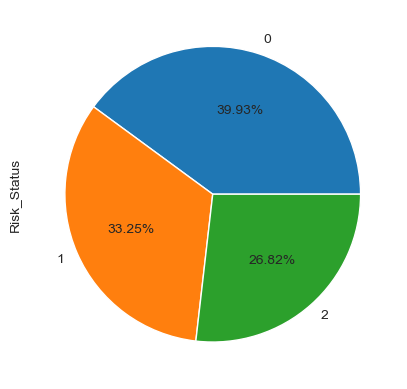

In [26]:
## viewing the proportion of the split

y_train.value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

### Building Machine Learning Models with Hyperparameter Tuning

### Extra Trees Classifier

#### Searching for best parameters

In [27]:
## Setting the different arguments of the parameters to be tested

ext_search = GridSearchCV(ExtraTreesClassifier(), 
                         {
    'n_estimators' : [50, 100, 250],
    'bootstrap' : [True, False],
    'criterion' : ["entropy", "gini"],
    'oob_score' : [True, False],
    'class_weight' : ['balanced', 'unbalanced_subsample'],
    'max_depth' : [6, 9, 12,15]
}, cv = 5, return_train_score = True)

In [28]:
## Searching for the best parameters based on the settings

ext_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'unbalanced_subsample'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [6, 9, 12, 15],
                         'n_estimators': [50, 100, 250],
                         'oob_score': [True, False]},
             return_train_score=True)

In [29]:
## Viewing the results

ext_search_table = pd.DataFrame(ext_search.cv_results_)
ext_search_table.to_csv('Extra_Trees_Paramters_and_results.csv', index = True)
ext_search_table = ext_search_table[['param_bootstrap', 'param_criterion', 'param_oob_score', 'param_n_estimators','param_class_weight', 'param_max_depth', 'mean_train_score']]
ext_search_table[ext_search_table['mean_train_score'] == ext_search_table['mean_train_score'].max()]

,param_bootstrap,param_criterion,param_oob_score,param_n_estimators,param_class_weight,param_max_depth,mean_train_score
139,False,gini,False,50,balanced,15,0.926451


In [30]:
## Final Results from our model

print("Best Estimator : \n", ext_search.best_estimator_)
print('='*30,"\nBest Score : ", ext_search.best_score_)
print('='*30,"\nBest Parameters : \n", ext_search.best_params_)

Best Estimator : 
 ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=250)
Best Score :  0.8219385016486465
Best Parameters : 
 {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'n_estimators': 250, 'oob_score': False}


#### Building an ExtraTrees model

In [31]:
## Setting up the final parameters to be used to build the model

ext_params = {
    'n_estimators' : 150,
    'max_depth' : 12,
    'bootstrap' : False,
    'oob_score' : False,
    'class_weight' : 'balanced',
    'criterion' : 'entropy'
}


## Building the model

ext_model = ExtraTreesClassifier(
    **ext_params
)

## Training the model

ext_model.fit(x_train, y_train)


## Viewing the scores from the results

print("Test Score : ", round(ext_model.score(x_test, y_test), 3), "Training Score : ", round(ext_model.score(x_train, y_train), 3))
print("Test Score : ", round(accuracy_score(y_test, ext_model.predict(x_test)), 3), "Training Score : ", round(accuracy_score(y_train, ext_model.predict(x_train)), 3))

Test Score :  0.867 Training Score :  0.91
Test Score :  0.867 Training Score :  0.91


### Random Forest Classifier

#### Searching for best parameters

In [32]:
## Setting the different arguments of the parameters to be tested

rf_search = GridSearchCV(RandomForestClassifier(class_weight = 'balanced'), 
                         {
    'n_estimators' : [50, 100, 250],
    'bootstrap' : [True, False],
    'criterion' : ["entropy", "gini"],
    'oob_score' : [True, False],
}, cv = 5, return_train_score = True)

In [33]:
## Searching for the best parameters based on the settings

rf_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'n_estimators': [50, 100, 250],
                         'oob_score': [True, False]},
             return_train_score=True)

In [34]:
## Viewing the results

rf_search_table = pd.DataFrame(rf_search.cv_results_)
rf_search_table.to_csv('Random_Forest_Paramters_and_results.csv', index = True)
rf_search_table = rf_search_table[['param_bootstrap', 'param_criterion', 'param_oob_score', 'param_n_estimators', 'mean_train_score']]
rf_search_table[rf_search_table['mean_train_score'] == rf_search_table['mean_train_score'].max()]

,param_bootstrap,param_criterion,param_oob_score,param_n_estimators,params,mean_train_score
2,True,entropy,True,100,"{'bootstrap': True, 'criterion': 'entropy', 'n...",0.92676
3,True,entropy,False,100,"{'bootstrap': True, 'criterion': 'entropy', 'n...",0.92676
4,True,entropy,True,250,"{'bootstrap': True, 'criterion': 'entropy', 'n...",0.92676
10,True,gini,True,250,"{'bootstrap': True, 'criterion': 'gini', 'n_es...",0.92676
11,True,gini,False,250,"{'bootstrap': True, 'criterion': 'gini', 'n_es...",0.92676
13,False,entropy,False,50,"{'bootstrap': False, 'criterion': 'entropy', '...",0.92676
15,False,entropy,False,100,"{'bootstrap': False, 'criterion': 'entropy', '...",0.92676
17,False,entropy,False,250,"{'bootstrap': False, 'criterion': 'entropy', '...",0.92676
19,False,gini,False,50,"{'bootstrap': False, 'criterion': 'gini', 'n_e...",0.92676
21,False,gini,False,100,"{'bootstrap': False, 'criterion': 'gini', 'n_e...",0.92676


In [35]:
## Final Results from our model

print("Best Estimator : \n", rf_search.best_estimator_)
print('='*30,"\nBest Score : ", rf_search.best_score_)
print('='*30,"\nBest Parameters : \n", rf_search.best_params_)

Best Estimator : 
 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=50, oob_score=True)
Best Score :  0.8095851545126906
Best Parameters : 
 {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 50, 'oob_score': True}


#### Building Random Forest Model

In [36]:
## Setting up the final parameters to be used to build the model

rf_params = {
    'n_estimators' : 250, 
    'bootstrap' : False, 
    'criterion' : "gini",
    'class_weight' : "balanced",
    'oob_score' : False
}

## Building the model

rf_model = RandomForestClassifier(
        **rf_params
)

## Training the model

rf_model.fit(x_train, y_train)


## Viewing the scores from the results

print("Test Score : ", round(rf_model.score(x_test, y_test), 3), "Training Score : ", round(rf_model.score(x_train, y_train), 3))
print("Test Score : ", round(accuracy_score(y_test, rf_model.predict(x_test)), 3), "Training Score : ", round(accuracy_score(y_train, rf_model.predict(x_train)), 3))

Test Score :  0.906 Training Score :  0.922
Test Score :  0.906 Training Score :  0.922


### XGBoost Classifier

#### Searching for best parameters

In [37]:
xgb_search = GridSearchCV(XGBClassifier(),
                          {
    'n_estimators' : [40, 100],
    'learning_rate' : [0.01, 0.1, 0.2],
    'max_depth' : [6, 9, 12], 
    'eval_metric' : ["rmse", "logloss"],
    'reg_lambda' : [0.1, 1.0, 2],
    'reg_alpha' : [0.1, 0.5, 2]
}, cv = 5, return_train_score = True)

In [38]:
xgb_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'eval_metric': ['rmse', 'logloss'],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [6, 9, 12], 'n_estimators': [40, 100],
                         'reg_alpha': [0.1, 0.5, 2],
                         'reg_lambda': [0.1, 1.0, 2]},
             return_train_score=True)

In [39]:
xgb_search_table = pd.DataFrame(xgb_search.cv_results_)
xgb_search_table.to_csv('XGBoost_Paramters_and_results.csv', index = True)
xgb_search_table = xgb_search_table[['param_reg_alpha', 'param_reg_lambda', 'param_eval_metric', 'param_learning_rate','param_max_depth', 'param_n_estimators', 'mean_train_score']]
xgb_search_table[xgb_search_table['mean_train_score'] == xgb_search_table['mean_train_score'].max()]

,param_reg_alpha,param_reg_lambda,param_eval_metric,param_learning_rate,param_max_depth,param_n_estimators,params,mean_train_score
99,0.1,0.1,rmse,0.1,12,100,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.92676
100,0.1,1.0,rmse,0.1,12,100,"{'eval_metric': 'rmse', 'learning_rate': 0.1, ...",0.92676
117,0.1,0.1,rmse,0.2,6,100,"{'eval_metric': 'rmse', 'learning_rate': 0.2, ...",0.92676
135,0.1,0.1,rmse,0.2,9,100,"{'eval_metric': 'rmse', 'learning_rate': 0.2, ...",0.92676
136,0.1,1.0,rmse,0.2,9,100,"{'eval_metric': 'rmse', 'learning_rate': 0.2, ...",0.92676
137,0.1,2,rmse,0.2,9,100,"{'eval_metric': 'rmse', 'learning_rate': 0.2, ...",0.92676
144,0.1,0.1,rmse,0.2,12,40,"{'eval_metric': 'rmse', 'learning_rate': 0.2, ...",0.92676
153,0.1,0.1,rmse,0.2,12,100,"{'eval_metric': 'rmse', 'learning_rate': 0.2, ...",0.92676
154,0.1,1.0,rmse,0.2,12,100,"{'eval_metric': 'rmse', 'learning_rate': 0.2, ...",0.92676
155,0.1,2,rmse,0.2,12,100,"{'eval_metric': 'rmse', 'learning_rate': 0.2, ...",0.92676


In [40]:
print("Best Estimator : \n", xgb_search.best_estimator_)
print('='*30, "\nBest Score : ", xgb_search.best_score_)
print('='*30, "\nBest Parameters : \n", xgb_search.best_params_)

Best Estimator : 
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
Best Score :  0.8108657311555861
Best Parameters : 
 {'eval_metric': 'rmse', 'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1}


#### Building XGBoost Model

In [41]:
# Build XGBoost Classifier

xgb_params = {
    'n_estimators' : 40, 
    'max_depth' : 9, 
    'eval_metric' : "rmse"
}

xgboost_model = XGBClassifier(
    **xgb_params
)

xgboost_model.fit(x_train, y_train)

print("Test Score : ", round(xgboost_model.score(x_test, y_test), 3), "Training Score : ", round(xgboost_model.score(x_train, y_train), 3))
print("Test Score : ", round(accuracy_score(y_test, xgboost_model.predict(x_test)), 3), "Training Score : ", round(accuracy_score(y_train, xgboost_model.predict(x_train)), 3))

Test Score :  0.887 Training Score :  0.922
Test Score :  0.887 Training Score :  0.922


### LightGBM Classifier

#### Searching for best parameters

In [42]:
lgbm_search = GridSearchCV(LGBMClassifier(),
                          {
    'boosting_type' : ['gbdt', 'dart', 'goss'],
    'max_depth' : [9, 12],
    'reg_lambda' : [0.1, 0.5, 2],
    'reg_alpha' : [0.1, 1.0, 2]              
}, cv = 5, return_train_score = True)

In [43]:
lgbm_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'max_depth': [9, 12], 'reg_alpha': [0.1, 1.0, 2],
                         'reg_lambda': [0.1, 0.5, 2]},
             return_train_score=True)

In [44]:
lgbm_search_table = pd.DataFrame(lgbm_search.cv_results_)
lgbm_search_table.to_csv('LGBM_Paramters_and_results.csv', index = True)
lgbm_search_table = lgbm_search_table[['param_boosting_type',  'param_reg_alpha', 'param_reg_lambda', 'param_max_depth', 'mean_train_score']]
lgbm_search_table[lgbm_search_table['mean_train_score'] == lgbm_search_table['mean_train_score'].max()]

,param_boosting_type,param_reg_alpha,param_reg_lambda,param_max_depth,params,mean_train_score
9,gbdt,0.1,0.1,12,"{'boosting_type': 'gbdt', 'max_depth': 12, 're...",0.920887


In [45]:
print("Best Estimator : \n", lgbm_search.best_estimator_)
print('='*30, "\nBest Score : ", lgbm_search.best_score_)
print('='*30, "\nBest Parameters : \n", lgbm_search.best_params_)

Best Estimator : 
 LGBMClassifier(max_depth=9, reg_alpha=0.1, reg_lambda=0.1)
Best Score :  0.783659228586765
Best Parameters : 
 {'boosting_type': 'gbdt', 'max_depth': 9, 'reg_alpha': 0.1, 'reg_lambda': 0.1}


#### Building LightGBM Model

In [46]:
# Build Light Gradient Boosting Machine

lgbm_params = {
    'boosting_type' : 'gbdt',
    'max_depth' : 9,
    'reg_alpha' : 0.1,
    'reg_lambda' : 0.1
}

lgbm_model = LGBMClassifier(
    **lgbm_params
)

lgbm_model.fit(x_train, y_train)

print("Test Score : ", round(lgbm_model.score(x_test, y_test), 3), "  Training Score : ", round(lgbm_model.score(x_train, y_train), 3))
print("Test Score : ", round(accuracy_score(y_test, lgbm_model.predict(x_test)), 3), "  Training Score : ", round(accuracy_score(y_train, lgbm_model.predict(x_train)), 3))

Test Score :  0.882   Training Score :  0.92
Test Score :  0.882   Training Score :  0.92


### CatBoost Classifier

#### Searching for best parameters

In [47]:
catboost_search = GridSearchCV(CatBoostClassifier(),
                          {
    'learning_rate' : [0.01, 0.1, 0.2], 
    'iterations' : [50, 70, 90],
    'depth' : [6, 9]
    
}, cv = 5, return_train_score = True)

In [48]:
catboost_search.fit(x_train, y_train)

0:	learn: 1.0928409	total: 181ms	remaining: 8.88s
1:	learn: 1.0879875	total: 188ms	remaining: 4.5s
2:	learn: 1.0826478	total: 193ms	remaining: 3.03s
3:	learn: 1.0769429	total: 198ms	remaining: 2.27s
4:	learn: 1.0704528	total: 203ms	remaining: 1.83s
5:	learn: 1.0647335	total: 208ms	remaining: 1.52s
6:	learn: 1.0592708	total: 213ms	remaining: 1.3s
7:	learn: 1.0540556	total: 218ms	remaining: 1.14s
8:	learn: 1.0489135	total: 221ms	remaining: 1.01s
9:	learn: 1.0443837	total: 224ms	remaining: 896ms
10:	learn: 1.0394732	total: 226ms	remaining: 802ms
11:	learn: 1.0349826	total: 229ms	remaining: 724ms
12:	learn: 1.0298553	total: 231ms	remaining: 658ms
13:	learn: 1.0248556	total: 233ms	remaining: 599ms
14:	learn: 1.0198952	total: 235ms	remaining: 548ms
15:	learn: 1.0154725	total: 236ms	remaining: 502ms
16:	learn: 1.0110187	total: 238ms	remaining: 462ms
17:	learn: 1.0073146	total: 240ms	remaining: 426ms
18:	learn: 1.0030978	total: 241ms	remaining: 393ms
19:	learn: 0.9992607	total: 243ms	remaining

0:	learn: 1.0430162	total: 2.1ms	remaining: 103ms
1:	learn: 1.0019600	total: 3.88ms	remaining: 93ms
2:	learn: 0.9657049	total: 5.23ms	remaining: 81.9ms
3:	learn: 0.9294071	total: 6.97ms	remaining: 80.1ms
4:	learn: 0.8935099	total: 8.8ms	remaining: 79.2ms
5:	learn: 0.8626362	total: 10.5ms	remaining: 77.1ms
6:	learn: 0.8355085	total: 13ms	remaining: 79.9ms
7:	learn: 0.8138800	total: 14.5ms	remaining: 76ms
8:	learn: 0.7926450	total: 16.2ms	remaining: 73.7ms
9:	learn: 0.7773459	total: 17.5ms	remaining: 70.1ms
10:	learn: 0.7589341	total: 18.9ms	remaining: 67ms
11:	learn: 0.7451873	total: 20.3ms	remaining: 64.2ms
12:	learn: 0.7314354	total: 21.6ms	remaining: 61.5ms
13:	learn: 0.7161401	total: 22.9ms	remaining: 59ms
14:	learn: 0.7014309	total: 24.3ms	remaining: 56.8ms
15:	learn: 0.6908079	total: 25.7ms	remaining: 54.7ms
16:	learn: 0.6820208	total: 27.1ms	remaining: 52.6ms
17:	learn: 0.6748689	total: 28.5ms	remaining: 50.6ms
18:	learn: 0.6689064	total: 30.3ms	remaining: 49.4ms
19:	learn: 0.662

49:	learn: 0.5493918	total: 72.3ms	remaining: 0us
0:	learn: 1.0426698	total: 1.61ms	remaining: 79.1ms
1:	learn: 0.9984185	total: 3.16ms	remaining: 75.8ms
2:	learn: 0.9590356	total: 4.58ms	remaining: 71.7ms
3:	learn: 0.9227162	total: 5.92ms	remaining: 68.1ms
4:	learn: 0.8885034	total: 7.3ms	remaining: 65.7ms
5:	learn: 0.8608608	total: 8.69ms	remaining: 63.7ms
6:	learn: 0.8349018	total: 10.3ms	remaining: 63.1ms
7:	learn: 0.8084156	total: 11.6ms	remaining: 61.2ms
8:	learn: 0.7905046	total: 13ms	remaining: 59.4ms
9:	learn: 0.7739175	total: 14.4ms	remaining: 57.6ms
10:	learn: 0.7552948	total: 15.8ms	remaining: 55.9ms
11:	learn: 0.7394539	total: 17.1ms	remaining: 54.3ms
12:	learn: 0.7281348	total: 18.6ms	remaining: 52.9ms
13:	learn: 0.7158497	total: 20ms	remaining: 51.4ms
14:	learn: 0.7056126	total: 21.3ms	remaining: 49.8ms
15:	learn: 0.6973594	total: 22.7ms	remaining: 48.2ms
16:	learn: 0.6865107	total: 24.2ms	remaining: 46.9ms
17:	learn: 0.6791984	total: 25.5ms	remaining: 45.4ms
18:	learn: 

11:	learn: 0.6171368	total: 18.2ms	remaining: 57.5ms
12:	learn: 0.6065691	total: 20.5ms	remaining: 58.2ms
13:	learn: 0.5939132	total: 22.1ms	remaining: 56.7ms
14:	learn: 0.5842612	total: 23.6ms	remaining: 55.1ms
15:	learn: 0.5755593	total: 25ms	remaining: 53.2ms
16:	learn: 0.5699379	total: 26.5ms	remaining: 51.4ms
17:	learn: 0.5618747	total: 28.3ms	remaining: 50.3ms
18:	learn: 0.5566804	total: 29.9ms	remaining: 48.7ms
19:	learn: 0.5522697	total: 31.7ms	remaining: 47.5ms
20:	learn: 0.5459333	total: 33.7ms	remaining: 46.6ms
21:	learn: 0.5404397	total: 36.2ms	remaining: 46.1ms
22:	learn: 0.5350922	total: 37.9ms	remaining: 44.5ms
23:	learn: 0.5284064	total: 39.4ms	remaining: 42.6ms
24:	learn: 0.5251564	total: 40.7ms	remaining: 40.7ms
25:	learn: 0.5203240	total: 42.3ms	remaining: 39ms
26:	learn: 0.5182662	total: 43ms	remaining: 36.6ms
27:	learn: 0.5136347	total: 44.7ms	remaining: 35.1ms
28:	learn: 0.5096139	total: 46.1ms	remaining: 33.4ms
29:	learn: 0.5059715	total: 47.5ms	remaining: 31.6ms

62:	learn: 0.8541840	total: 86.3ms	remaining: 9.59ms
63:	learn: 0.8510693	total: 88ms	remaining: 8.25ms
64:	learn: 0.8487458	total: 89.9ms	remaining: 6.92ms
65:	learn: 0.8460838	total: 91.7ms	remaining: 5.56ms
66:	learn: 0.8438313	total: 93.4ms	remaining: 4.18ms
67:	learn: 0.8413104	total: 95ms	remaining: 2.79ms
68:	learn: 0.8389179	total: 96.5ms	remaining: 1.4ms
69:	learn: 0.8366879	total: 98ms	remaining: 0us
0:	learn: 1.0927019	total: 1.67ms	remaining: 115ms
1:	learn: 1.0874643	total: 3.05ms	remaining: 104ms
2:	learn: 1.0831117	total: 4.44ms	remaining: 99.1ms
3:	learn: 1.0780785	total: 5.82ms	remaining: 96ms
4:	learn: 1.0721720	total: 7.63ms	remaining: 99.3ms
5:	learn: 1.0667853	total: 9.03ms	remaining: 96.3ms
6:	learn: 1.0617006	total: 10.6ms	remaining: 95.1ms
7:	learn: 1.0562846	total: 11.9ms	remaining: 92.4ms
8:	learn: 1.0517234	total: 13.3ms	remaining: 90.1ms
9:	learn: 1.0468934	total: 14.6ms	remaining: 87.9ms
10:	learn: 1.0416540	total: 16ms	remaining: 85.8ms
11:	learn: 1.037019

26:	learn: 0.9752195	total: 38.8ms	remaining: 61.9ms
27:	learn: 0.9714791	total: 40.6ms	remaining: 60.9ms
28:	learn: 0.9679609	total: 42.6ms	remaining: 60.2ms
29:	learn: 0.9638735	total: 44.2ms	remaining: 59ms
30:	learn: 0.9602976	total: 45.9ms	remaining: 57.7ms
31:	learn: 0.9568214	total: 47.4ms	remaining: 56.3ms
32:	learn: 0.9535094	total: 48.9ms	remaining: 54.8ms
33:	learn: 0.9499869	total: 50.4ms	remaining: 53.3ms
34:	learn: 0.9460770	total: 52.4ms	remaining: 52.4ms
35:	learn: 0.9437575	total: 53.8ms	remaining: 50.8ms
36:	learn: 0.9404733	total: 55.4ms	remaining: 49.4ms
37:	learn: 0.9369154	total: 56.8ms	remaining: 47.8ms
38:	learn: 0.9349674	total: 58.9ms	remaining: 46.8ms
39:	learn: 0.9314210	total: 60.9ms	remaining: 45.7ms
40:	learn: 0.9277565	total: 62.4ms	remaining: 44.1ms
41:	learn: 0.9246352	total: 63.7ms	remaining: 42.5ms
42:	learn: 0.9209757	total: 65.1ms	remaining: 40.9ms
43:	learn: 0.9180585	total: 66.8ms	remaining: 39.5ms
44:	learn: 0.9146159	total: 68.3ms	remaining: 37

0:	learn: 1.0417440	total: 2ms	remaining: 138ms
1:	learn: 0.9975050	total: 3.83ms	remaining: 130ms
2:	learn: 0.9646261	total: 5.47ms	remaining: 122ms
3:	learn: 0.9354393	total: 7.27ms	remaining: 120ms
4:	learn: 0.8986616	total: 8.68ms	remaining: 113ms
5:	learn: 0.8691961	total: 10.3ms	remaining: 110ms
6:	learn: 0.8454218	total: 11.9ms	remaining: 107ms
7:	learn: 0.8239079	total: 13.3ms	remaining: 103ms
8:	learn: 0.8039442	total: 14.7ms	remaining: 99.5ms
9:	learn: 0.7881119	total: 16ms	remaining: 96.2ms
10:	learn: 0.7682408	total: 17.5ms	remaining: 93.8ms
11:	learn: 0.7520918	total: 18.8ms	remaining: 91.1ms
12:	learn: 0.7378626	total: 20.2ms	remaining: 88.6ms
13:	learn: 0.7248050	total: 21.6ms	remaining: 86.6ms
14:	learn: 0.7124041	total: 23ms	remaining: 84.3ms
15:	learn: 0.7033711	total: 24.5ms	remaining: 82.8ms
16:	learn: 0.6949960	total: 26ms	remaining: 81.1ms
17:	learn: 0.6841669	total: 27.4ms	remaining: 79.1ms
18:	learn: 0.6783165	total: 28.7ms	remaining: 77.2ms
19:	learn: 0.6710473

66:	learn: 0.5078990	total: 94.7ms	remaining: 4.24ms
67:	learn: 0.5058757	total: 96.7ms	remaining: 2.84ms
68:	learn: 0.5043095	total: 98.4ms	remaining: 1.43ms
69:	learn: 0.5014311	total: 99.9ms	remaining: 0us
0:	learn: 1.0426698	total: 1.66ms	remaining: 115ms
1:	learn: 0.9984185	total: 3.02ms	remaining: 103ms
2:	learn: 0.9590356	total: 4.55ms	remaining: 102ms
3:	learn: 0.9227162	total: 6.05ms	remaining: 99.8ms
4:	learn: 0.8885034	total: 7.5ms	remaining: 97.5ms
5:	learn: 0.8608608	total: 8.98ms	remaining: 95.8ms
6:	learn: 0.8349018	total: 10.3ms	remaining: 92.9ms
7:	learn: 0.8084156	total: 11.7ms	remaining: 90.6ms
8:	learn: 0.7905046	total: 13.1ms	remaining: 88.8ms
9:	learn: 0.7739175	total: 14.5ms	remaining: 87.1ms
10:	learn: 0.7552948	total: 15.8ms	remaining: 85ms
11:	learn: 0.7394539	total: 17.2ms	remaining: 83.2ms
12:	learn: 0.7281348	total: 18.7ms	remaining: 81.8ms
13:	learn: 0.7158497	total: 20.2ms	remaining: 80.9ms
14:	learn: 0.7056126	total: 21.6ms	remaining: 79.3ms
15:	learn: 0

43:	learn: 0.4555184	total: 63.4ms	remaining: 37.4ms
44:	learn: 0.4518474	total: 65.2ms	remaining: 36.2ms
45:	learn: 0.4490383	total: 67.3ms	remaining: 35.1ms
46:	learn: 0.4463221	total: 68.8ms	remaining: 33.7ms
47:	learn: 0.4423291	total: 70.7ms	remaining: 32.4ms
48:	learn: 0.4386675	total: 72.1ms	remaining: 30.9ms
49:	learn: 0.4347061	total: 73.7ms	remaining: 29.5ms
50:	learn: 0.4305943	total: 75.2ms	remaining: 28ms
51:	learn: 0.4282921	total: 76.7ms	remaining: 26.6ms
52:	learn: 0.4251883	total: 78.3ms	remaining: 25.1ms
53:	learn: 0.4227643	total: 79.8ms	remaining: 23.6ms
54:	learn: 0.4197980	total: 81.4ms	remaining: 22.2ms
55:	learn: 0.4178691	total: 83.5ms	remaining: 20.9ms
56:	learn: 0.4143822	total: 85.9ms	remaining: 19.6ms
57:	learn: 0.4121082	total: 87.3ms	remaining: 18.1ms
58:	learn: 0.4092484	total: 88.7ms	remaining: 16.5ms
59:	learn: 0.4073556	total: 90.1ms	remaining: 15ms
60:	learn: 0.4046323	total: 91.6ms	remaining: 13.5ms
61:	learn: 0.4018179	total: 93.1ms	remaining: 12ms

21:	learn: 0.5529781	total: 39.4ms	remaining: 86ms
22:	learn: 0.5470318	total: 43ms	remaining: 87.9ms
23:	learn: 0.5452422	total: 44.5ms	remaining: 85.3ms
24:	learn: 0.5374439	total: 45.9ms	remaining: 82.7ms
25:	learn: 0.5341236	total: 47.3ms	remaining: 80ms
26:	learn: 0.5302338	total: 48.7ms	remaining: 77.5ms
27:	learn: 0.5228261	total: 50ms	remaining: 75ms
28:	learn: 0.5183316	total: 51.4ms	remaining: 72.6ms
29:	learn: 0.5145457	total: 52.8ms	remaining: 70.4ms
30:	learn: 0.5082993	total: 54.2ms	remaining: 68.2ms
31:	learn: 0.5033910	total: 55.5ms	remaining: 66ms
32:	learn: 0.4999106	total: 57.4ms	remaining: 64.4ms
33:	learn: 0.4907532	total: 59.1ms	remaining: 62.6ms
34:	learn: 0.4882312	total: 60.6ms	remaining: 60.6ms
35:	learn: 0.4827261	total: 62.3ms	remaining: 58.8ms
36:	learn: 0.4781330	total: 63.7ms	remaining: 56.8ms
37:	learn: 0.4711966	total: 65.3ms	remaining: 55ms
38:	learn: 0.4670289	total: 66.9ms	remaining: 53.2ms
39:	learn: 0.4623156	total: 68.5ms	remaining: 51.3ms
40:	lea

63:	learn: 0.8657036	total: 90.3ms	remaining: 36.7ms
64:	learn: 0.8632102	total: 92.2ms	remaining: 35.5ms
65:	learn: 0.8610792	total: 94.3ms	remaining: 34.3ms
66:	learn: 0.8581976	total: 95.9ms	remaining: 32.9ms
67:	learn: 0.8556078	total: 97.4ms	remaining: 31.5ms
68:	learn: 0.8528306	total: 98.9ms	remaining: 30.1ms
69:	learn: 0.8506712	total: 99.7ms	remaining: 28.5ms
70:	learn: 0.8480723	total: 101ms	remaining: 27.1ms
71:	learn: 0.8458869	total: 103ms	remaining: 25.8ms
72:	learn: 0.8433426	total: 105ms	remaining: 24.4ms
73:	learn: 0.8412392	total: 106ms	remaining: 23ms
74:	learn: 0.8390793	total: 108ms	remaining: 21.5ms
75:	learn: 0.8367683	total: 109ms	remaining: 20.1ms
76:	learn: 0.8348067	total: 111ms	remaining: 18.8ms
77:	learn: 0.8329071	total: 113ms	remaining: 17.4ms
78:	learn: 0.8307560	total: 115ms	remaining: 16ms
79:	learn: 0.8285689	total: 116ms	remaining: 14.5ms
80:	learn: 0.8265306	total: 118ms	remaining: 13.1ms
81:	learn: 0.8242324	total: 119ms	remaining: 11.7ms
82:	learn

74:	learn: 0.8397206	total: 104ms	remaining: 20.9ms
75:	learn: 0.8375891	total: 106ms	remaining: 19.6ms
76:	learn: 0.8350176	total: 108ms	remaining: 18.2ms
77:	learn: 0.8327158	total: 110ms	remaining: 16.9ms
78:	learn: 0.8304305	total: 112ms	remaining: 15.6ms
79:	learn: 0.8280597	total: 113ms	remaining: 14.2ms
80:	learn: 0.8258659	total: 115ms	remaining: 12.8ms
81:	learn: 0.8237012	total: 116ms	remaining: 11.4ms
82:	learn: 0.8219197	total: 118ms	remaining: 9.95ms
83:	learn: 0.8195327	total: 120ms	remaining: 8.54ms
84:	learn: 0.8175813	total: 121ms	remaining: 7.12ms
85:	learn: 0.8157473	total: 123ms	remaining: 5.7ms
86:	learn: 0.8135316	total: 124ms	remaining: 4.28ms
87:	learn: 0.8116378	total: 127ms	remaining: 2.88ms
88:	learn: 0.8098309	total: 129ms	remaining: 1.44ms
89:	learn: 0.8084675	total: 130ms	remaining: 0us
0:	learn: 1.0928054	total: 3.62ms	remaining: 322ms
1:	learn: 1.0875248	total: 6.52ms	remaining: 287ms
2:	learn: 1.0821915	total: 8.88ms	remaining: 258ms
3:	learn: 1.0766916

0:	learn: 1.0417440	total: 3.56ms	remaining: 317ms
1:	learn: 0.9975050	total: 6.22ms	remaining: 274ms
2:	learn: 0.9646261	total: 8.76ms	remaining: 254ms
3:	learn: 0.9354393	total: 10.9ms	remaining: 235ms
4:	learn: 0.8986616	total: 12.7ms	remaining: 216ms
5:	learn: 0.8691961	total: 14.6ms	remaining: 204ms
6:	learn: 0.8454218	total: 16.4ms	remaining: 195ms
7:	learn: 0.8239079	total: 18ms	remaining: 185ms
8:	learn: 0.8039442	total: 19.6ms	remaining: 177ms
9:	learn: 0.7881119	total: 21.2ms	remaining: 170ms
10:	learn: 0.7682408	total: 22.7ms	remaining: 163ms
11:	learn: 0.7520918	total: 24.2ms	remaining: 158ms
12:	learn: 0.7378626	total: 25.6ms	remaining: 152ms
13:	learn: 0.7248050	total: 27ms	remaining: 146ms
14:	learn: 0.7124041	total: 28.4ms	remaining: 142ms
15:	learn: 0.7033711	total: 29.7ms	remaining: 137ms
16:	learn: 0.6949960	total: 31.1ms	remaining: 133ms
17:	learn: 0.6841669	total: 32.5ms	remaining: 130ms
18:	learn: 0.6783165	total: 34.1ms	remaining: 127ms
19:	learn: 0.6710473	total

6:	learn: 0.8552901	total: 11.9ms	remaining: 141ms
7:	learn: 0.8293512	total: 14.8ms	remaining: 152ms
8:	learn: 0.8128636	total: 16.3ms	remaining: 147ms
9:	learn: 0.7944671	total: 17.6ms	remaining: 141ms
10:	learn: 0.7782065	total: 19.4ms	remaining: 139ms
11:	learn: 0.7641782	total: 20.9ms	remaining: 136ms
12:	learn: 0.7479111	total: 23.1ms	remaining: 137ms
13:	learn: 0.7333028	total: 24.6ms	remaining: 134ms
14:	learn: 0.7223292	total: 26.2ms	remaining: 131ms
15:	learn: 0.7114737	total: 27.8ms	remaining: 128ms
16:	learn: 0.7024871	total: 29.6ms	remaining: 127ms
17:	learn: 0.6920056	total: 31.7ms	remaining: 127ms
18:	learn: 0.6825665	total: 34.1ms	remaining: 127ms
19:	learn: 0.6740753	total: 35.7ms	remaining: 125ms
20:	learn: 0.6650028	total: 37.7ms	remaining: 124ms
21:	learn: 0.6596615	total: 40ms	remaining: 124ms
22:	learn: 0.6529259	total: 41.4ms	remaining: 121ms
23:	learn: 0.6447853	total: 42.8ms	remaining: 118ms
24:	learn: 0.6381713	total: 44.2ms	remaining: 115ms
25:	learn: 0.63163

0:	learn: 0.9921695	total: 6.39ms	remaining: 569ms
1:	learn: 0.9232043	total: 10.6ms	remaining: 467ms
2:	learn: 0.8696581	total: 12.5ms	remaining: 364ms
3:	learn: 0.8176256	total: 14.4ms	remaining: 310ms
4:	learn: 0.7742666	total: 17.7ms	remaining: 301ms
5:	learn: 0.7398641	total: 19.6ms	remaining: 274ms
6:	learn: 0.7108390	total: 21.3ms	remaining: 252ms
7:	learn: 0.6921248	total: 23.1ms	remaining: 237ms
8:	learn: 0.6739350	total: 24.6ms	remaining: 222ms
9:	learn: 0.6593323	total: 26.5ms	remaining: 212ms
10:	learn: 0.6416048	total: 28.1ms	remaining: 202ms
11:	learn: 0.6276413	total: 29.6ms	remaining: 192ms
12:	learn: 0.6154300	total: 31.3ms	remaining: 186ms
13:	learn: 0.6049405	total: 34.8ms	remaining: 189ms
14:	learn: 0.5967147	total: 37ms	remaining: 185ms
15:	learn: 0.5873686	total: 38.6ms	remaining: 178ms
16:	learn: 0.5819034	total: 40.6ms	remaining: 175ms
17:	learn: 0.5767071	total: 43.2ms	remaining: 173ms
18:	learn: 0.5710900	total: 45.3ms	remaining: 169ms
19:	learn: 0.5641599	tot

10:	learn: 0.6296423	total: 26ms	remaining: 187ms
11:	learn: 0.6171368	total: 27.9ms	remaining: 181ms
12:	learn: 0.6065691	total: 30.2ms	remaining: 179ms
13:	learn: 0.5939132	total: 31.9ms	remaining: 173ms
14:	learn: 0.5842612	total: 33.3ms	remaining: 167ms
15:	learn: 0.5755593	total: 34.9ms	remaining: 162ms
16:	learn: 0.5699379	total: 36.7ms	remaining: 157ms
17:	learn: 0.5618747	total: 38.6ms	remaining: 154ms
18:	learn: 0.5566804	total: 40.4ms	remaining: 151ms
19:	learn: 0.5522697	total: 41.9ms	remaining: 147ms
20:	learn: 0.5459333	total: 43.7ms	remaining: 144ms
21:	learn: 0.5404397	total: 46.9ms	remaining: 145ms
22:	learn: 0.5350922	total: 49.5ms	remaining: 144ms
23:	learn: 0.5284064	total: 51.5ms	remaining: 142ms
24:	learn: 0.5251564	total: 52.8ms	remaining: 137ms
25:	learn: 0.5203240	total: 54.6ms	remaining: 134ms
26:	learn: 0.5182662	total: 55.2ms	remaining: 129ms
27:	learn: 0.5136347	total: 56.6ms	remaining: 125ms
28:	learn: 0.5096139	total: 57.9ms	remaining: 122ms
29:	learn: 0.5

0:	learn: 0.9914992	total: 3.53ms	remaining: 314ms
1:	learn: 0.9189272	total: 8.77ms	remaining: 386ms
2:	learn: 0.8617985	total: 10.5ms	remaining: 304ms
3:	learn: 0.8109743	total: 14.6ms	remaining: 314ms
4:	learn: 0.7688242	total: 23.3ms	remaining: 396ms
5:	learn: 0.7387592	total: 27.3ms	remaining: 382ms
6:	learn: 0.7089141	total: 29.9ms	remaining: 355ms
7:	learn: 0.6865186	total: 31.6ms	remaining: 324ms
8:	learn: 0.6709314	total: 38.1ms	remaining: 343ms
9:	learn: 0.6524228	total: 41.2ms	remaining: 330ms
10:	learn: 0.6397823	total: 43.6ms	remaining: 313ms
11:	learn: 0.6254001	total: 46ms	remaining: 299ms
12:	learn: 0.6110654	total: 47.8ms	remaining: 283ms
13:	learn: 0.6011484	total: 49.7ms	remaining: 270ms
14:	learn: 0.5917977	total: 52.8ms	remaining: 264ms
15:	learn: 0.5850487	total: 54.5ms	remaining: 252ms
16:	learn: 0.5801709	total: 57.4ms	remaining: 246ms
17:	learn: 0.5767150	total: 59ms	remaining: 236ms
18:	learn: 0.5691785	total: 60.6ms	remaining: 226ms
19:	learn: 0.5646139	total

0:	learn: 1.0930194	total: 6.69ms	remaining: 328ms
1:	learn: 1.0876961	total: 12.7ms	remaining: 305ms
2:	learn: 1.0822927	total: 19.5ms	remaining: 305ms
3:	learn: 1.0766745	total: 25.3ms	remaining: 291ms
4:	learn: 1.0718450	total: 30.2ms	remaining: 272ms
5:	learn: 1.0672884	total: 35ms	remaining: 257ms
6:	learn: 1.0619247	total: 39.5ms	remaining: 242ms
7:	learn: 1.0566480	total: 44.1ms	remaining: 232ms
8:	learn: 1.0520222	total: 49ms	remaining: 223ms
9:	learn: 1.0466181	total: 51.6ms	remaining: 206ms
10:	learn: 1.0419499	total: 56ms	remaining: 199ms
11:	learn: 1.0374978	total: 61ms	remaining: 193ms
12:	learn: 1.0325398	total: 66.2ms	remaining: 188ms
13:	learn: 1.0278000	total: 70.9ms	remaining: 182ms
14:	learn: 1.0230551	total: 75.6ms	remaining: 176ms
15:	learn: 1.0183588	total: 80.4ms	remaining: 171ms
16:	learn: 1.0137589	total: 85.1ms	remaining: 165ms
17:	learn: 1.0094900	total: 90.3ms	remaining: 161ms
18:	learn: 1.0053105	total: 95.3ms	remaining: 155ms
19:	learn: 1.0017020	total: 10

32:	learn: 0.5423288	total: 207ms	remaining: 107ms
33:	learn: 0.5354426	total: 213ms	remaining: 100ms
34:	learn: 0.5310729	total: 219ms	remaining: 93.9ms
35:	learn: 0.5271604	total: 226ms	remaining: 87.7ms
36:	learn: 0.5216446	total: 232ms	remaining: 81.4ms
37:	learn: 0.5158735	total: 237ms	remaining: 74.9ms
38:	learn: 0.5122820	total: 242ms	remaining: 68.2ms
39:	learn: 0.5082579	total: 247ms	remaining: 61.8ms
40:	learn: 0.5044522	total: 252ms	remaining: 55.3ms
41:	learn: 0.5007746	total: 256ms	remaining: 48.8ms
42:	learn: 0.4972787	total: 262ms	remaining: 42.6ms
43:	learn: 0.4934199	total: 266ms	remaining: 36.3ms
44:	learn: 0.4898022	total: 271ms	remaining: 30.1ms
45:	learn: 0.4866277	total: 276ms	remaining: 24ms
46:	learn: 0.4843934	total: 281ms	remaining: 17.9ms
47:	learn: 0.4808680	total: 285ms	remaining: 11.9ms
48:	learn: 0.4781662	total: 290ms	remaining: 5.91ms
49:	learn: 0.4743963	total: 295ms	remaining: 0us
0:	learn: 1.0419039	total: 4.74ms	remaining: 232ms
1:	learn: 0.9986363	

47:	learn: 0.4917702	total: 246ms	remaining: 10.3ms
48:	learn: 0.4884391	total: 253ms	remaining: 5.16ms
49:	learn: 0.4840493	total: 258ms	remaining: 0us
0:	learn: 1.0460177	total: 5.54ms	remaining: 272ms
1:	learn: 0.9922169	total: 7.92ms	remaining: 190ms
2:	learn: 0.9476184	total: 12.6ms	remaining: 198ms
3:	learn: 0.9132830	total: 17.3ms	remaining: 199ms
4:	learn: 0.8846108	total: 21.9ms	remaining: 197ms
5:	learn: 0.8544654	total: 26.7ms	remaining: 196ms
6:	learn: 0.8280127	total: 31.3ms	remaining: 192ms
7:	learn: 0.8028228	total: 36.1ms	remaining: 189ms
8:	learn: 0.7828004	total: 41ms	remaining: 187ms
9:	learn: 0.7624362	total: 45.6ms	remaining: 182ms
10:	learn: 0.7460438	total: 50.8ms	remaining: 180ms
11:	learn: 0.7304059	total: 55.6ms	remaining: 176ms
12:	learn: 0.7139450	total: 60.2ms	remaining: 171ms
13:	learn: 0.6968896	total: 64.8ms	remaining: 167ms
14:	learn: 0.6832165	total: 69.6ms	remaining: 162ms
15:	learn: 0.6729483	total: 74.1ms	remaining: 158ms
16:	learn: 0.6624122	total:

41:	learn: 0.3785318	total: 210ms	remaining: 40.1ms
42:	learn: 0.3748583	total: 217ms	remaining: 35.3ms
43:	learn: 0.3708101	total: 223ms	remaining: 30.5ms
44:	learn: 0.3675886	total: 230ms	remaining: 25.6ms
45:	learn: 0.3630085	total: 237ms	remaining: 20.6ms
46:	learn: 0.3584584	total: 247ms	remaining: 15.8ms
47:	learn: 0.3538964	total: 255ms	remaining: 10.6ms
48:	learn: 0.3502901	total: 261ms	remaining: 5.33ms
49:	learn: 0.3471252	total: 266ms	remaining: 0us
0:	learn: 0.9994784	total: 7.11ms	remaining: 349ms
1:	learn: 0.9188353	total: 12.2ms	remaining: 294ms
2:	learn: 0.8646242	total: 13.3ms	remaining: 208ms
3:	learn: 0.8233370	total: 20.1ms	remaining: 231ms
4:	learn: 0.7767331	total: 28.4ms	remaining: 256ms
5:	learn: 0.7400587	total: 36.2ms	remaining: 265ms
6:	learn: 0.7122742	total: 44.4ms	remaining: 273ms
7:	learn: 0.6853232	total: 49.6ms	remaining: 261ms
8:	learn: 0.6627768	total: 56.6ms	remaining: 258ms
9:	learn: 0.6445183	total: 61.4ms	remaining: 246ms
10:	learn: 0.6291808	tota

3:	learn: 1.0760786	total: 24.6ms	remaining: 406ms
4:	learn: 1.0713505	total: 32.2ms	remaining: 419ms
5:	learn: 1.0661314	total: 38.4ms	remaining: 409ms
6:	learn: 1.0614910	total: 43.9ms	remaining: 395ms
7:	learn: 1.0566560	total: 49.8ms	remaining: 386ms
8:	learn: 1.0517917	total: 55.9ms	remaining: 379ms
9:	learn: 1.0469908	total: 66.3ms	remaining: 398ms
10:	learn: 1.0424933	total: 75.9ms	remaining: 407ms
11:	learn: 1.0378562	total: 81.5ms	remaining: 394ms
12:	learn: 1.0327869	total: 88.1ms	remaining: 386ms
13:	learn: 1.0282636	total: 92.8ms	remaining: 371ms
14:	learn: 1.0237205	total: 97.5ms	remaining: 357ms
15:	learn: 1.0196512	total: 103ms	remaining: 349ms
16:	learn: 1.0151184	total: 108ms	remaining: 337ms
17:	learn: 1.0110323	total: 110ms	remaining: 319ms
18:	learn: 1.0064701	total: 115ms	remaining: 309ms
19:	learn: 1.0020415	total: 121ms	remaining: 303ms
20:	learn: 0.9980007	total: 126ms	remaining: 294ms
21:	learn: 0.9941444	total: 131ms	remaining: 285ms
22:	learn: 0.9904327	total

38:	learn: 0.9307007	total: 214ms	remaining: 170ms
39:	learn: 0.9276971	total: 221ms	remaining: 166ms
40:	learn: 0.9242499	total: 229ms	remaining: 162ms
41:	learn: 0.9211518	total: 234ms	remaining: 156ms
42:	learn: 0.9179617	total: 239ms	remaining: 150ms
43:	learn: 0.9147663	total: 249ms	remaining: 147ms
44:	learn: 0.9119331	total: 263ms	remaining: 146ms
45:	learn: 0.9085284	total: 268ms	remaining: 140ms
46:	learn: 0.9054838	total: 274ms	remaining: 134ms
47:	learn: 0.9025506	total: 281ms	remaining: 129ms
48:	learn: 0.8991756	total: 286ms	remaining: 123ms
49:	learn: 0.8963135	total: 295ms	remaining: 118ms
50:	learn: 0.8936163	total: 300ms	remaining: 112ms
51:	learn: 0.8905890	total: 306ms	remaining: 106ms
52:	learn: 0.8879205	total: 313ms	remaining: 100ms
53:	learn: 0.8851444	total: 320ms	remaining: 94.9ms
54:	learn: 0.8818140	total: 324ms	remaining: 88.4ms
55:	learn: 0.8788379	total: 330ms	remaining: 82.5ms
56:	learn: 0.8757020	total: 338ms	remaining: 77ms
57:	learn: 0.8726694	total: 3

1:	learn: 0.9986363	total: 8.15ms	remaining: 277ms
2:	learn: 0.9596287	total: 14.6ms	remaining: 327ms
3:	learn: 0.9204694	total: 21.1ms	remaining: 348ms
4:	learn: 0.8909488	total: 27.8ms	remaining: 361ms
5:	learn: 0.8617776	total: 33.7ms	remaining: 360ms
6:	learn: 0.8372981	total: 38.4ms	remaining: 345ms
7:	learn: 0.8131682	total: 43.3ms	remaining: 336ms
8:	learn: 0.7922340	total: 48.5ms	remaining: 328ms
9:	learn: 0.7731138	total: 53.1ms	remaining: 318ms
10:	learn: 0.7568193	total: 57.6ms	remaining: 309ms
11:	learn: 0.7423737	total: 62.4ms	remaining: 302ms
12:	learn: 0.7252197	total: 67.1ms	remaining: 294ms
13:	learn: 0.7092784	total: 72.4ms	remaining: 290ms
14:	learn: 0.6946568	total: 78.7ms	remaining: 289ms
15:	learn: 0.6844729	total: 83.4ms	remaining: 281ms
16:	learn: 0.6733186	total: 88ms	remaining: 274ms
17:	learn: 0.6604852	total: 92.9ms	remaining: 268ms
18:	learn: 0.6462782	total: 97.6ms	remaining: 262ms
19:	learn: 0.6366626	total: 102ms	remaining: 255ms
20:	learn: 0.6293701	tot

35:	learn: 0.5329643	total: 219ms	remaining: 206ms
36:	learn: 0.5284901	total: 224ms	remaining: 200ms
37:	learn: 0.5239508	total: 230ms	remaining: 194ms
38:	learn: 0.5202785	total: 236ms	remaining: 188ms
39:	learn: 0.5158309	total: 243ms	remaining: 182ms
40:	learn: 0.5130590	total: 249ms	remaining: 176ms
41:	learn: 0.5094279	total: 253ms	remaining: 169ms
42:	learn: 0.5061427	total: 258ms	remaining: 162ms
43:	learn: 0.5029885	total: 262ms	remaining: 155ms
44:	learn: 0.4998035	total: 267ms	remaining: 149ms
45:	learn: 0.4990985	total: 269ms	remaining: 140ms
46:	learn: 0.4954328	total: 273ms	remaining: 134ms
47:	learn: 0.4917702	total: 278ms	remaining: 127ms
48:	learn: 0.4884391	total: 283ms	remaining: 121ms
49:	learn: 0.4840493	total: 287ms	remaining: 115ms
50:	learn: 0.4801297	total: 292ms	remaining: 109ms
51:	learn: 0.4778293	total: 297ms	remaining: 103ms
52:	learn: 0.4737973	total: 301ms	remaining: 96.7ms
53:	learn: 0.4714507	total: 306ms	remaining: 90.6ms
54:	learn: 0.4681080	total: 3

0:	learn: 0.9894296	total: 5.37ms	remaining: 371ms
1:	learn: 0.9195976	total: 10.2ms	remaining: 346ms
2:	learn: 0.8602663	total: 15.2ms	remaining: 339ms
3:	learn: 0.8104634	total: 19.7ms	remaining: 324ms
4:	learn: 0.7757773	total: 24.4ms	remaining: 318ms
5:	learn: 0.7379390	total: 29.3ms	remaining: 312ms
6:	learn: 0.7114509	total: 34.5ms	remaining: 310ms
7:	learn: 0.6875548	total: 39.2ms	remaining: 304ms
8:	learn: 0.6652174	total: 44.1ms	remaining: 299ms
9:	learn: 0.6454219	total: 48.7ms	remaining: 292ms
10:	learn: 0.6247577	total: 53.5ms	remaining: 287ms
11:	learn: 0.6108878	total: 58.2ms	remaining: 281ms
12:	learn: 0.5940846	total: 63.1ms	remaining: 277ms
13:	learn: 0.5803683	total: 67.9ms	remaining: 272ms
14:	learn: 0.5659090	total: 72.7ms	remaining: 267ms
15:	learn: 0.5559592	total: 77.6ms	remaining: 262ms
16:	learn: 0.5427654	total: 82.6ms	remaining: 258ms
17:	learn: 0.5347476	total: 87.3ms	remaining: 252ms
18:	learn: 0.5231594	total: 92ms	remaining: 247ms
19:	learn: 0.5165019	tot

47:	learn: 0.3658152	total: 231ms	remaining: 106ms
48:	learn: 0.3630042	total: 236ms	remaining: 101ms
49:	learn: 0.3595943	total: 242ms	remaining: 96.8ms
50:	learn: 0.3547519	total: 247ms	remaining: 92.1ms
51:	learn: 0.3516933	total: 253ms	remaining: 87.7ms
52:	learn: 0.3476574	total: 259ms	remaining: 83ms
53:	learn: 0.3439238	total: 263ms	remaining: 78.1ms
54:	learn: 0.3410660	total: 268ms	remaining: 73.1ms
55:	learn: 0.3377367	total: 273ms	remaining: 68.2ms
56:	learn: 0.3349941	total: 277ms	remaining: 63.3ms
57:	learn: 0.3316956	total: 282ms	remaining: 58.3ms
58:	learn: 0.3288153	total: 287ms	remaining: 53.4ms
59:	learn: 0.3256616	total: 291ms	remaining: 48.5ms
60:	learn: 0.3224247	total: 296ms	remaining: 43.6ms
61:	learn: 0.3196628	total: 300ms	remaining: 38.7ms
62:	learn: 0.3170063	total: 305ms	remaining: 33.9ms
63:	learn: 0.3139083	total: 309ms	remaining: 29ms
64:	learn: 0.3110333	total: 314ms	remaining: 24.1ms
65:	learn: 0.3081738	total: 318ms	remaining: 19.3ms
66:	learn: 0.30592

0:	learn: 1.0927542	total: 5.61ms	remaining: 499ms
1:	learn: 1.0876648	total: 8.76ms	remaining: 386ms
2:	learn: 1.0818353	total: 15.2ms	remaining: 440ms
3:	learn: 1.0760786	total: 20.3ms	remaining: 437ms
4:	learn: 1.0713505	total: 25ms	remaining: 425ms
5:	learn: 1.0661314	total: 29.6ms	remaining: 414ms
6:	learn: 1.0614910	total: 34.5ms	remaining: 409ms
7:	learn: 1.0566560	total: 39.2ms	remaining: 402ms
8:	learn: 1.0517917	total: 43.8ms	remaining: 394ms
9:	learn: 1.0469908	total: 48.8ms	remaining: 390ms
10:	learn: 1.0424933	total: 53.3ms	remaining: 383ms
11:	learn: 1.0378562	total: 57.9ms	remaining: 376ms
12:	learn: 1.0327869	total: 62.6ms	remaining: 371ms
13:	learn: 1.0282636	total: 67.2ms	remaining: 365ms
14:	learn: 1.0237205	total: 72ms	remaining: 360ms
15:	learn: 1.0196512	total: 76.5ms	remaining: 354ms
16:	learn: 1.0151184	total: 81.2ms	remaining: 349ms
17:	learn: 1.0110323	total: 84ms	remaining: 336ms
18:	learn: 1.0064701	total: 89.5ms	remaining: 335ms
19:	learn: 1.0020415	total: 

72:	learn: 0.8319261	total: 337ms	remaining: 78.5ms
73:	learn: 0.8296203	total: 342ms	remaining: 73.9ms
74:	learn: 0.8268112	total: 347ms	remaining: 69.5ms
75:	learn: 0.8243595	total: 353ms	remaining: 65ms
76:	learn: 0.8217162	total: 359ms	remaining: 60.6ms
77:	learn: 0.8197693	total: 365ms	remaining: 56.2ms
78:	learn: 0.8176077	total: 370ms	remaining: 51.5ms
79:	learn: 0.8155642	total: 372ms	remaining: 46.5ms
80:	learn: 0.8132501	total: 377ms	remaining: 41.9ms
81:	learn: 0.8114847	total: 382ms	remaining: 37.2ms
82:	learn: 0.8090414	total: 386ms	remaining: 32.6ms
83:	learn: 0.8067761	total: 391ms	remaining: 27.9ms
84:	learn: 0.8044818	total: 396ms	remaining: 23.3ms
85:	learn: 0.8024533	total: 401ms	remaining: 18.7ms
86:	learn: 0.8002280	total: 406ms	remaining: 14ms
87:	learn: 0.7980639	total: 411ms	remaining: 9.33ms
88:	learn: 0.7960098	total: 415ms	remaining: 4.66ms
89:	learn: 0.7942554	total: 420ms	remaining: 0us
0:	learn: 1.0932668	total: 8.42ms	remaining: 749ms
1:	learn: 1.0876630	

85:	learn: 0.7974505	total: 395ms	remaining: 18.4ms
86:	learn: 0.7952463	total: 400ms	remaining: 13.8ms
87:	learn: 0.7935163	total: 405ms	remaining: 9.21ms
88:	learn: 0.7914758	total: 411ms	remaining: 4.62ms
89:	learn: 0.7892929	total: 417ms	remaining: 0us
0:	learn: 1.0458279	total: 4.56ms	remaining: 406ms
1:	learn: 0.9945946	total: 9.68ms	remaining: 426ms
2:	learn: 0.9563734	total: 15.8ms	remaining: 459ms
3:	learn: 0.9147516	total: 21.2ms	remaining: 456ms
4:	learn: 0.8816378	total: 26.1ms	remaining: 445ms
5:	learn: 0.8519101	total: 32.9ms	remaining: 461ms
6:	learn: 0.8301051	total: 40.5ms	remaining: 481ms
7:	learn: 0.8101590	total: 50.4ms	remaining: 517ms
8:	learn: 0.7899391	total: 56.1ms	remaining: 505ms
9:	learn: 0.7691311	total: 61.3ms	remaining: 490ms
10:	learn: 0.7518789	total: 67.4ms	remaining: 484ms
11:	learn: 0.7336052	total: 73.6ms	remaining: 478ms
12:	learn: 0.7181943	total: 79.6ms	remaining: 471ms
13:	learn: 0.7034943	total: 85.5ms	remaining: 464ms
14:	learn: 0.6905500	tota

88:	learn: 0.3749125	total: 421ms	remaining: 4.73ms
89:	learn: 0.3720255	total: 427ms	remaining: 0us
0:	learn: 1.0445432	total: 4.76ms	remaining: 424ms
1:	learn: 0.9987573	total: 9.49ms	remaining: 417ms
2:	learn: 0.9570326	total: 15.3ms	remaining: 444ms
3:	learn: 0.9184289	total: 21ms	remaining: 451ms
4:	learn: 0.8884652	total: 26.6ms	remaining: 451ms
5:	learn: 0.8625456	total: 32.1ms	remaining: 450ms
6:	learn: 0.8346357	total: 37.7ms	remaining: 448ms
7:	learn: 0.8102399	total: 43.1ms	remaining: 442ms
8:	learn: 0.7895877	total: 48.1ms	remaining: 433ms
9:	learn: 0.7695596	total: 53.8ms	remaining: 430ms
10:	learn: 0.7502345	total: 59.3ms	remaining: 426ms
11:	learn: 0.7331004	total: 64.3ms	remaining: 418ms
12:	learn: 0.7188586	total: 70.2ms	remaining: 416ms
13:	learn: 0.7046625	total: 76.9ms	remaining: 418ms
14:	learn: 0.6910398	total: 82ms	remaining: 410ms
15:	learn: 0.6766857	total: 86.8ms	remaining: 402ms
16:	learn: 0.6650432	total: 91.3ms	remaining: 392ms
17:	learn: 0.6564233	total: 9

83:	learn: 0.3895500	total: 445ms	remaining: 31.8ms
84:	learn: 0.3871418	total: 453ms	remaining: 26.7ms
85:	learn: 0.3850446	total: 458ms	remaining: 21.3ms
86:	learn: 0.3831138	total: 464ms	remaining: 16ms
87:	learn: 0.3814275	total: 471ms	remaining: 10.7ms
88:	learn: 0.3796778	total: 485ms	remaining: 5.45ms
89:	learn: 0.3770750	total: 499ms	remaining: 0us
0:	learn: 1.0460177	total: 6.95ms	remaining: 619ms
1:	learn: 0.9922169	total: 9.94ms	remaining: 437ms
2:	learn: 0.9476184	total: 16.2ms	remaining: 471ms
3:	learn: 0.9132830	total: 23.6ms	remaining: 508ms
4:	learn: 0.8846108	total: 28.4ms	remaining: 483ms
5:	learn: 0.8544654	total: 37.6ms	remaining: 526ms
6:	learn: 0.8280127	total: 42.4ms	remaining: 503ms
7:	learn: 0.8028228	total: 48.2ms	remaining: 494ms
8:	learn: 0.7828004	total: 53ms	remaining: 477ms
9:	learn: 0.7624362	total: 57.6ms	remaining: 461ms
10:	learn: 0.7460438	total: 62.6ms	remaining: 450ms
11:	learn: 0.7304059	total: 67.8ms	remaining: 441ms
12:	learn: 0.7139450	total: 7

80:	learn: 0.2781515	total: 543ms	remaining: 60.3ms
81:	learn: 0.2767310	total: 550ms	remaining: 53.6ms
82:	learn: 0.2747186	total: 555ms	remaining: 46.8ms
83:	learn: 0.2731140	total: 560ms	remaining: 40ms
84:	learn: 0.2717129	total: 567ms	remaining: 33.4ms
85:	learn: 0.2703920	total: 573ms	remaining: 26.6ms
86:	learn: 0.2695268	total: 577ms	remaining: 19.9ms
87:	learn: 0.2680901	total: 583ms	remaining: 13.2ms
88:	learn: 0.2664963	total: 587ms	remaining: 6.6ms
89:	learn: 0.2653775	total: 592ms	remaining: 0us
0:	learn: 0.9894296	total: 4.62ms	remaining: 411ms
1:	learn: 0.9195976	total: 9.28ms	remaining: 408ms
2:	learn: 0.8602663	total: 14ms	remaining: 406ms
3:	learn: 0.8104634	total: 18.6ms	remaining: 401ms
4:	learn: 0.7757773	total: 23.2ms	remaining: 395ms
5:	learn: 0.7379390	total: 27.9ms	remaining: 391ms
6:	learn: 0.7114509	total: 33ms	remaining: 392ms
7:	learn: 0.6875548	total: 37.7ms	remaining: 386ms
8:	learn: 0.6652174	total: 44.2ms	remaining: 398ms
9:	learn: 0.6454219	total: 49.7

63:	learn: 0.3053414	total: 314ms	remaining: 128ms
64:	learn: 0.3026848	total: 321ms	remaining: 123ms
65:	learn: 0.3007727	total: 327ms	remaining: 119ms
66:	learn: 0.2983051	total: 333ms	remaining: 114ms
67:	learn: 0.2960090	total: 340ms	remaining: 110ms
68:	learn: 0.2942144	total: 344ms	remaining: 105ms
69:	learn: 0.2923436	total: 349ms	remaining: 99.7ms
70:	learn: 0.2902441	total: 353ms	remaining: 94.6ms
71:	learn: 0.2885540	total: 358ms	remaining: 89.6ms
72:	learn: 0.2864636	total: 363ms	remaining: 84.6ms
73:	learn: 0.2849279	total: 368ms	remaining: 79.6ms
74:	learn: 0.2832733	total: 373ms	remaining: 74.5ms
75:	learn: 0.2816961	total: 378ms	remaining: 69.5ms
76:	learn: 0.2802137	total: 382ms	remaining: 64.5ms
77:	learn: 0.2782962	total: 387ms	remaining: 59.5ms
78:	learn: 0.2769123	total: 391ms	remaining: 54.5ms
79:	learn: 0.2748565	total: 396ms	remaining: 49.5ms
80:	learn: 0.2732395	total: 400ms	remaining: 44.5ms
81:	learn: 0.2718476	total: 405ms	remaining: 39.6ms
82:	learn: 0.27033

79:	learn: 0.2720809	total: 410ms	remaining: 51.2ms
80:	learn: 0.2705487	total: 417ms	remaining: 46.4ms
81:	learn: 0.2693920	total: 426ms	remaining: 41.5ms
82:	learn: 0.2676337	total: 433ms	remaining: 36.5ms
83:	learn: 0.2658896	total: 441ms	remaining: 31.5ms
84:	learn: 0.2639296	total: 448ms	remaining: 26.3ms
85:	learn: 0.2624090	total: 453ms	remaining: 21.1ms
86:	learn: 0.2607814	total: 460ms	remaining: 15.9ms
87:	learn: 0.2593713	total: 466ms	remaining: 10.6ms
88:	learn: 0.2581768	total: 473ms	remaining: 5.31ms
89:	learn: 0.2571124	total: 480ms	remaining: 0us
0:	learn: 0.9921506	total: 10.6ms	remaining: 947ms
1:	learn: 0.9109230	total: 14.9ms	remaining: 654ms
2:	learn: 0.8521132	total: 22.8ms	remaining: 662ms
3:	learn: 0.7995480	total: 30ms	remaining: 646ms
4:	learn: 0.7649218	total: 37.3ms	remaining: 634ms
5:	learn: 0.7302280	total: 43.9ms	remaining: 615ms
6:	learn: 0.7002435	total: 50.7ms	remaining: 601ms
7:	learn: 0.6744396	total: 62.1ms	remaining: 636ms
8:	learn: 0.6533299	total

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000026EBE65FB50>,
             param_grid={'depth': [6, 9], 'iterations': [50, 70, 90],
                         'learning_rate': [0.01, 0.1, 0.2]},
             return_train_score=True)

In [49]:
catboost_search_table = pd.DataFrame(catboost_search.cv_results_)
catboost_search_table.to_csv('CatBoost_Paramters_and_results.csv', index = True)
catboost_search_table = catboost_search_table[[ 'param_iterations', 'param_depth', 'param_learning_rate', 'mean_train_score']]
catboost_search_table[catboost_search_table['mean_train_score'] == catboost_search_table['mean_train_score'].max()]

,param_iterations,param_depth,param_learning_rate,params,mean_train_score
17,90,9,0.2,"{'depth': 9, 'iterations': 90, 'learning_rate'...",0.917488


In [50]:
print("Best Estimator : \n", catboost_search.best_estimator_)
print('='*30, "\nBest Score : ", catboost_search.best_score_)
print('='*30, "\nBest Parameters : \n", catboost_search.best_params_)

Best Estimator : 
Best Score :  0.7824630013035809
Best Parameters : 
 {'depth': 9, 'iterations': 90, 'learning_rate': 0.2}


#### Building Catboost Model

In [51]:
# Build CatBoost Model

cat_params = {
    'iterations' : 70,
    'depth' : 6,
    'eval_metric' : 'Accuracy'
}

catboost_model = CatBoostClassifier(
    **cat_params
)
                                   
catboost_model.fit(x_train, y_train)

print("Test Score : ", round(catboost_model.score(x_test, y_test), 3), "  Training Score : ", round(catboost_model.score(x_train, y_train), 3))
print("Test Score : ", round(accuracy_score(y_test, catboost_model.predict(x_test)), 3), "  Training Score : ", round(accuracy_score(y_train, catboost_model.predict(x_train)), 3))

Learning rate set to 0.5
0:	learn: 0.6736712	total: 2.13ms	remaining: 147ms
1:	learn: 0.7021014	total: 4.33ms	remaining: 147ms
2:	learn: 0.7008653	total: 6.04ms	remaining: 135ms
3:	learn: 0.7021014	total: 8.39ms	remaining: 138ms
4:	learn: 0.7107540	total: 10.8ms	remaining: 140ms
5:	learn: 0.7194067	total: 13.5ms	remaining: 144ms
6:	learn: 0.7367120	total: 16.1ms	remaining: 145ms
7:	learn: 0.7515451	total: 18.5ms	remaining: 143ms
8:	learn: 0.7577256	total: 20.9ms	remaining: 141ms
9:	learn: 0.7775031	total: 23.1ms	remaining: 139ms
10:	learn: 0.7713226	total: 25ms	remaining: 134ms
11:	learn: 0.7873918	total: 27.2ms	remaining: 131ms
12:	learn: 0.7824475	total: 29.1ms	remaining: 128ms
13:	learn: 0.7911001	total: 31.4ms	remaining: 125ms
14:	learn: 0.7948084	total: 34.8ms	remaining: 128ms
15:	learn: 0.7997528	total: 37.6ms	remaining: 127ms
16:	learn: 0.8034611	total: 73.1ms	remaining: 228ms
17:	learn: 0.8145859	total: 75.7ms	remaining: 219ms
18:	learn: 0.8170581	total: 78.1ms	remaining: 210ms

### Results from all models assessment

In [52]:
from lazypredict.Supervised import LazyClassifier

lazy_model = LazyClassifier()
classify, predict = lazy_model.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.13it/s]


In [53]:
performance = pd.DataFrame(classify)
performance.to_csv('Model_performance.csv', index = True)
performance.to_excel('Lazy predict.xlsx', index = True)
performance

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.90,0.90,None,0.90,0.33
ExtraTreesClassifier,0.89,0.89,None,0.89,0.24
LGBMClassifier,0.88,0.88,None,0.88,0.35
XGBClassifier,0.88,0.88,None,0.88,0.26
BaggingClassifier,0.87,0.88,None,0.87,0.06
DecisionTreeClassifier,0.86,0.87,None,0.86,0.02
ExtraTreeClassifier,0.84,0.84,None,0.84,0.01
LabelPropagation,0.84,0.84,None,0.84,0.05
LabelSpreading,0.83,0.83,None,0.83,0.05


### Confusion Matrix for all Training and Test Models

In [54]:
models = [rf_model, xgboost_model, lgbm_model, catboost_model]
names = ['Random Forest', 'XGBoost', 'LGBMboost', 'CatBoost']

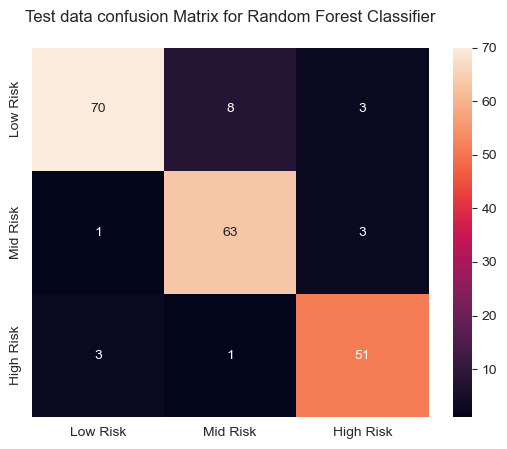

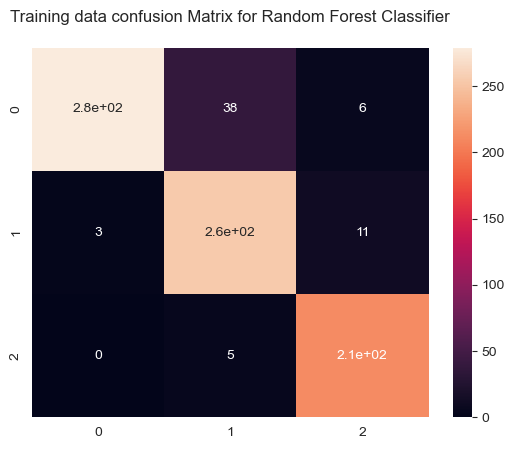

******************************************************************************** 






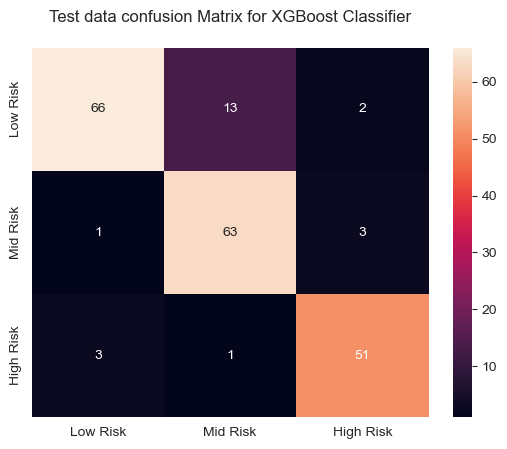

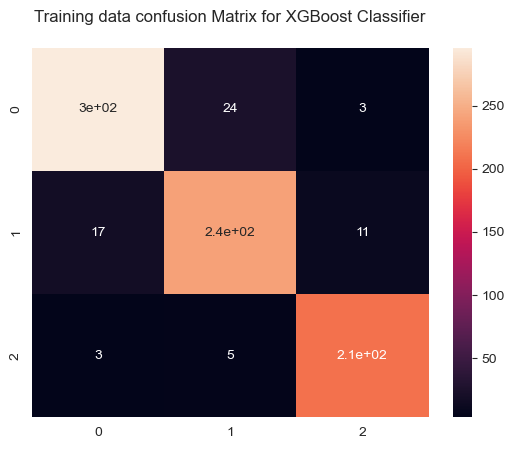

******************************************************************************** 






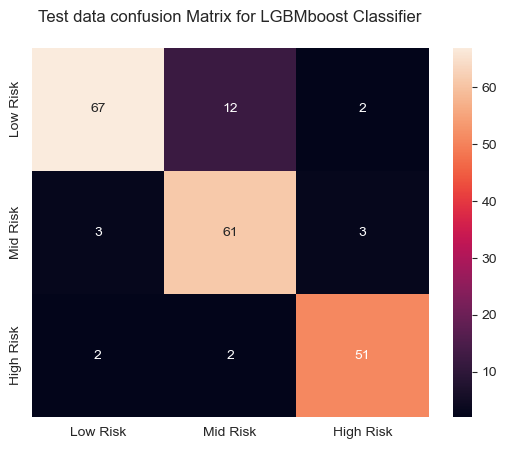

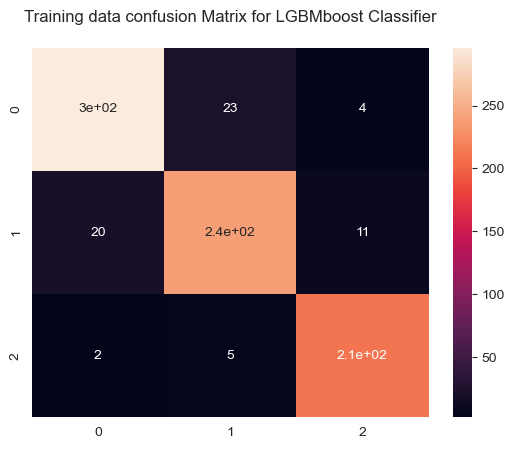

******************************************************************************** 






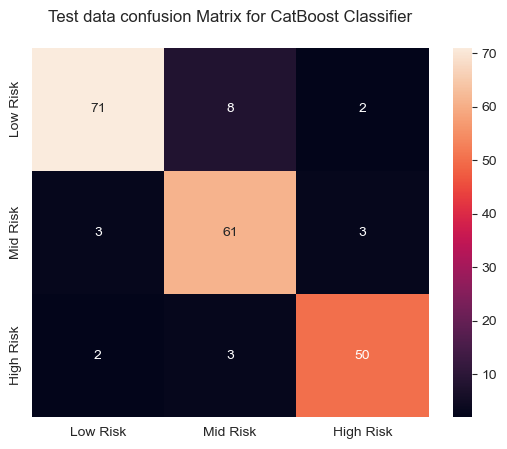

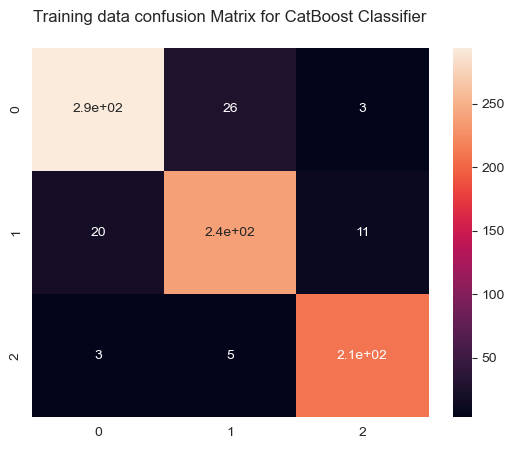

******************************************************************************** 






In [55]:
n = 0

for each in models:
    cf_test = confusion_matrix(y_test, each.predict(x_test))
    cf_train = confusion_matrix(y_train, each.predict(x_train))
    plt.title("Test data confusion Matrix for " + names[n] + " Classifier\n")
    sns.heatmap(cf_test, annot = True, xticklabels = ['Low Risk', 'Mid Risk', 'High Risk'], yticklabels = ['Low Risk', 'Mid Risk', 'High Risk'])
    plt.savefig(fname = str('Confusion Matrix for ' + names[n] + ' model'), format = 'jpeg')
    plt.show()
    
    plt.title("Training data confusion Matrix for " + names[n] + " Classifier\n")
    sns.heatmap(cf_train, annot = True)
    plt.savefig(fname = names[n], format = 'jpeg')
    plt.show()
    print('*'*80, '\n')
    print('='*80, '\n'*3)
    n += 1

### Classification Report

In [56]:
n = 0
for ml in models:
    print(names[n])
    print("Classification Report for Test data\n", classification_report(y_test, ml.predict(x_test), target_names=['Low Risk', 'Mid Risk', 'High Risk']))
    print("Classification Report for Training data\n", classification_report(y_train, ml.predict(x_train), target_names=['Low Risk', 'Mid Risk', 'High Risk']), '='*60,'\n'*2)
    n += 1

Random Forest
Classification Report for Test data
               precision    recall  f1-score   support

    Low Risk       0.95      0.86      0.90        81
    Mid Risk       0.88      0.94      0.91        67
   High Risk       0.89      0.93      0.91        55

    accuracy                           0.91       203
   macro avg       0.91      0.91      0.91       203
weighted avg       0.91      0.91      0.91       203

Classification Report for Training data
               precision    recall  f1-score   support

    Low Risk       0.99      0.86      0.92       323
    Mid Risk       0.86      0.95      0.90       269
   High Risk       0.93      0.98      0.95       217

    accuracy                           0.92       809
   macro avg       0.92      0.93      0.92       809
weighted avg       0.93      0.92      0.92       809


XGBoost
Classification Report for Test data
               precision    recall  f1-score   support

    Low Risk       0.94      0.81      0.87  

## Factors that Contribute to Maternal Health Risk

In [57]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort indices in descending order of importance
sorted_indices = np.argsort(feature_importances)[::-1]

#### Selecting the most important features Using Principal Component Analysis

In [58]:
## features/variables that capture 90% of the information in the data

from sklearn.decomposition import PCA

pca = PCA(0.90)
x_pca = pca.fit_transform(maternal.drop(['RiskLevel', 'AgeLevel'], axis = 1))
print(x_pca.shape[1], 'variables capture 90% of the information about the data')

3 variables capture 90% of the information about the data


#### Display the top 3 most important features

In [59]:
top_features = [maternal.columns[i] for i in sorted_indices[:x_pca.shape[1]]]
print("Top", x_pca.shape[1], "most important features : ")
for i in top_features:
    print(i)

Top 3 most important features : 
BS
SystolicBP
Age


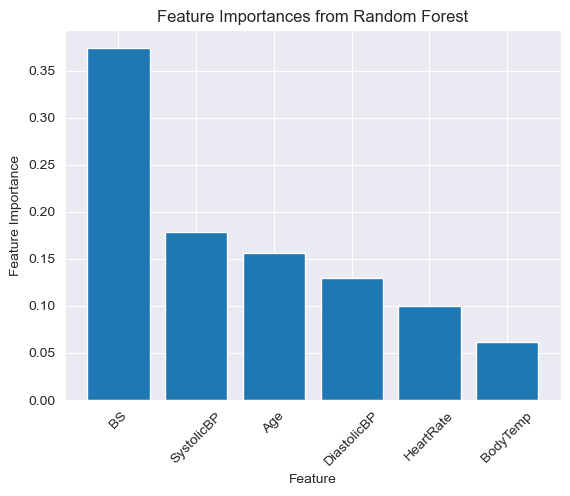

In [60]:
# Plot feature importances Using Bar Plot

plt.bar(range(x.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(x.shape[1]), np.array(maternal.columns)[sorted_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances from Random Forest")
plt.savefig(fname = "Feature Importances bar chart from Random Forest", format = "jpeg")
plt.show()

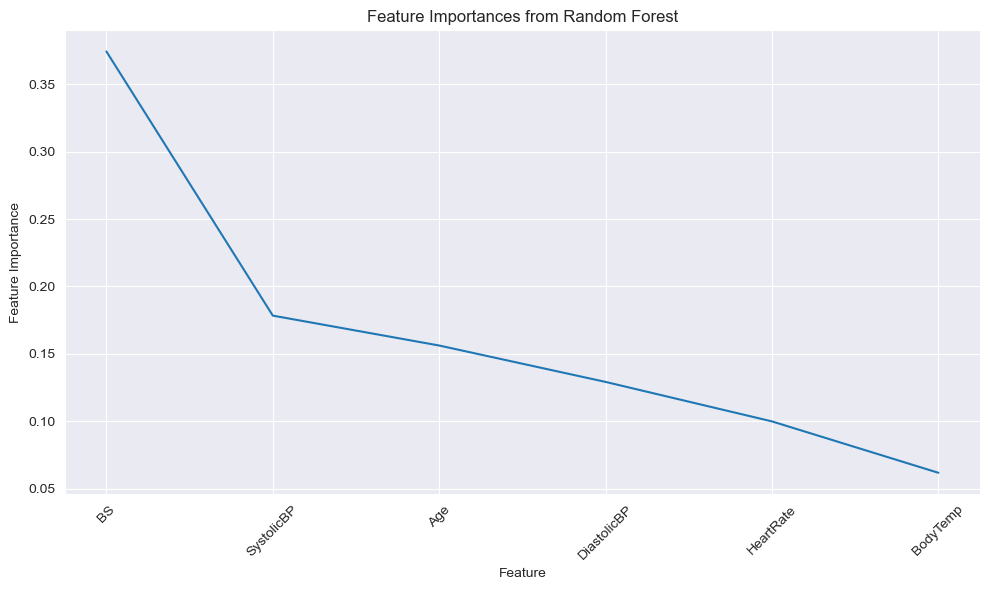

In [61]:
# Plot feature importances Using Line Plot

plt.figure(figsize=(10, 6))
plt.plot(range(x.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(x.shape[1]), np.array(maternal.columns)[sorted_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances from Random Forest")
plt.savefig(fname = "Feature Importances line plot from Random Forest", format = "jpeg")
plt.tight_layout()
plt.show()

### Exploring the trends between top 3 features against the risk level

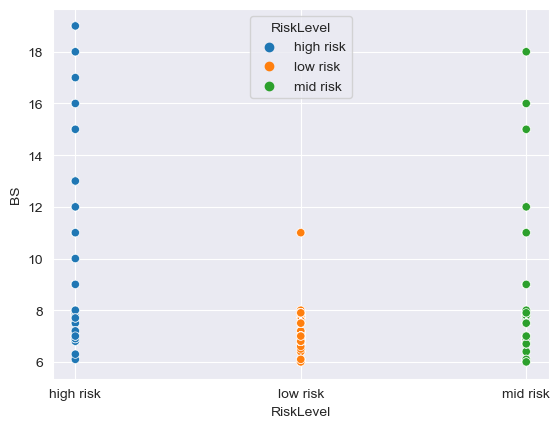

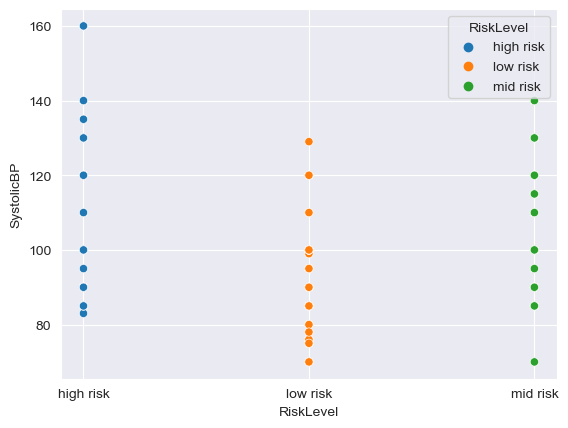

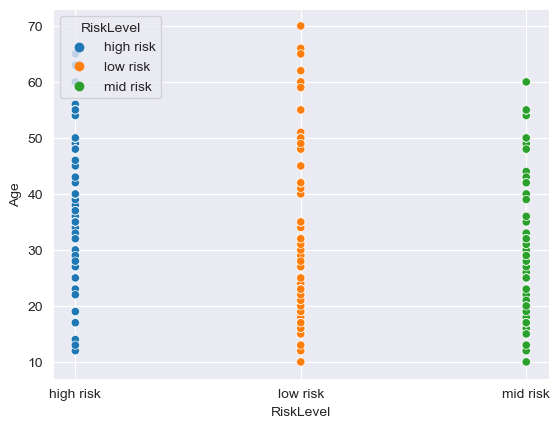

In [62]:
features = ['BS', 'SystolicBP', 'Age']
for item in features:
    sns.scatterplot(x = 'RiskLevel', y = item, data = maternal, hue = 'RiskLevel')
    plt.savefig(fname = str('Important feature '+item+' against risk level'), format = 'jpeg')
    plt.show()

#### Relationships between most important features and Risk Level

In [63]:
features.append('Risk_Status')

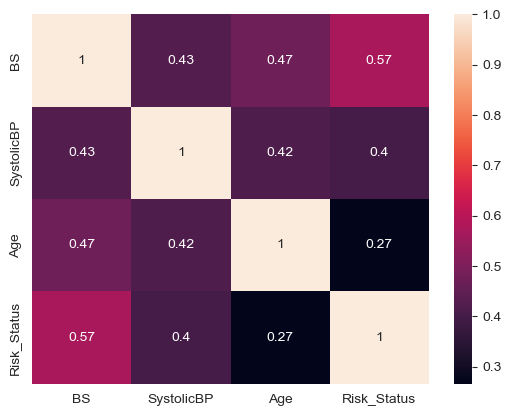

In [64]:
sns.heatmap(maternal[features].corr(), annot = True)
plt.savefig(fname = 'Correlation Matrix for important features', format = 'png')
plt.show()

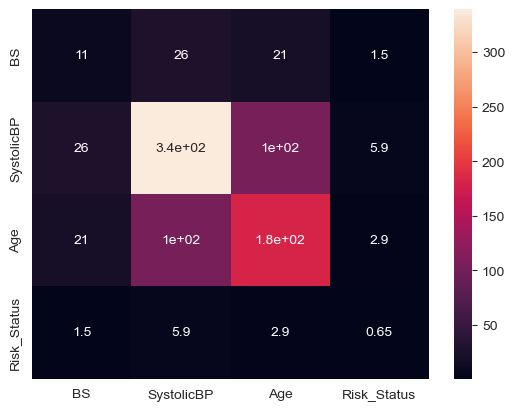

In [65]:
sns.heatmap(maternal[features].cov(), annot = True)
plt.savefig(fname = 'Covariance Matrix for important features', format = 'png')
plt.show()

## Building a Function to predict Maternal Health Risk of a Pregnant Woman

In [66]:
# User can use the function "model"
# put patients data in a tuple() to make predictions

def maternity_risk(data):
    new = np.asarray(data)
    shap = new.reshape(1,-1)
    risk = scaler.transform(shap)
    results = rf_model.predict(risk)
    i = 0
    varibles = ["Age","Systolic Blood Pressure", "Diastolic Blood Pressure", "Body Sugar Level","Body Temperature", "Heart Rate"]
    units = ['years','mmHg','mmHg','mmol/L','degree Farenheit', 'bpm']
    for p in varibles:
        print(p," is : ", data[i], units[i],'\n')
        i += 1
    print('*'*40)
    if results == 0:
        return("PATIENT HAS LOW MATERNAL HEALTH RISK")
    elif results == 1:
        return("PATIENT HAS MID MATERNAL HEALTH RISK")
    else:
        return("PATIENT HAS HIGH MATERNAL HEALTH RISK")

In [67]:
maternity_risk((31, 120, 60, 6.1, 98, 76))

Age  is :  31 years 

Systolic Blood Pressure  is :  120 mmHg 

Diastolic Blood Pressure  is :  60 mmHg 

Body Sugar Level  is :  6.1 mmol/L 

Body Temperature  is :  98 degree Farenheit 

Heart Rate  is :  76 bpm 

****************************************


'PATIENT HAS LOW MATERNAL HEALTH RISK'

## write and read the selected model to/from a file 

In [68]:
import pickle
with open('randomforest','wb') as Health_Risk:
    pickle.dump(maternity_risk, Health_Risk)
    
    
with open('randomforest','rb') as Health_Risk:
    model = pickle.load(Health_Risk)    

In [69]:
model((31, 120, 60, 6.1, 98, 76))

Age  is :  31 years 

Systolic Blood Pressure  is :  120 mmHg 

Diastolic Blood Pressure  is :  60 mmHg 

Body Sugar Level  is :  6.1 mmol/L 

Body Temperature  is :  98 degree Farenheit 

Heart Rate  is :  76 bpm 

****************************************


'PATIENT HAS LOW MATERNAL HEALTH RISK'

## Get working directory where all works will be saved

In [70]:
import os
os.getcwd()

'C:\\Users\\Dominic _Genius'

from sklearn import datasets
from sklearn.model_selection import train_test_split

#data = datasets.load_breast_cancer()

X = maternal.drop(['RiskLevexl', 'Risk_Status', 'AgeLevel'], axis = 1)
y = maternal.Risk_Status

a_train, a_test, b_train, b_test = train_test_split(X, y, 
                                                    test_size=.25,
                                                    random_state=1234)

### Making some predictions with random forest model

In [76]:
print('RANDOM FOREST')
test_prediction = rf_model.predict(x_test)[:10]
test_df = scaler.inverse_transform(x_test)[:10]
cols = maternal.columns
test_data = pd.DataFrame(test_df, columns = cols[:-3])
test_data['Prediction'] = test_prediction
values = np.asarray(y_test[:10])
test_data['Actual'] = values
test_data

RANDOM FOREST


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Prediction,Actual
0,28.00,115.00,60.00,7.50,38.30,86.00,1,1
1,17.00,90.00,60.00,7.50,38.30,76.00,0,0
2,32.00,120.00,80.00,6.80,36.70,70.00,1,1
3,25.00,140.00,100.00,7.50,36.70,80.00,2,2
4,23.00,130.00,70.00,7.01,36.70,78.00,1,1
5,31.00,120.00,60.00,6.10,36.70,76.00,1,1
6,32.00,140.00,90.00,18.00,36.70,88.00,2,2
7,21.00,75.00,50.00,6.10,36.70,70.00,0,0
8,30.00,140.00,100.00,15.00,36.70,70.00,2,2
9,48.00,120.00,80.00,11.00,36.70,88.00,2,1


### Making some predicitons with XGBoost model

In [77]:
print('XGBOOST')
test_prediction = xgboost_model.predict(x_test)[:10]
test_df = scaler.inverse_transform(x_test)[:10]
cols = maternal.columns
test_data = pd.DataFrame(test_df, columns = cols[:-3])
test_data['Prediction'] = test_prediction
values = np.asarray(y_test[:10])
test_data['Actual'] = values
test_data

XGBOOST


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Prediction,Actual
0,28.00,115.00,60.00,7.50,38.30,86.00,1,1
1,17.00,90.00,60.00,7.50,38.30,76.00,0,0
2,32.00,120.00,80.00,6.80,36.70,70.00,1,1
3,25.00,140.00,100.00,7.50,36.70,80.00,2,2
4,23.00,130.00,70.00,7.01,36.70,78.00,1,1
5,31.00,120.00,60.00,6.10,36.70,76.00,1,1
6,32.00,140.00,90.00,18.00,36.70,88.00,2,2
7,21.00,75.00,50.00,6.10,36.70,70.00,0,0
8,30.00,140.00,100.00,15.00,36.70,70.00,2,2
9,48.00,120.00,80.00,11.00,36.70,88.00,2,1


### Making predictions with CatBoost model

In [78]:
print('CATBOOST')
test_prediction = catboost_model.predict(x_test)[:10]
test_df = scaler.inverse_transform(x_test)[:10]
cols = maternal.columns
test_data = pd.DataFrame(test_df, columns = cols[:-3])
test_data['Prediction'] = test_prediction
values = np.asarray(y_test[:10])
test_data['Actual'] = values
test_data

CATBOOST


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Prediction,Actual
0,28.00,115.00,60.00,7.50,38.30,86.00,1,1
1,17.00,90.00,60.00,7.50,38.30,76.00,0,0
2,32.00,120.00,80.00,6.80,36.70,70.00,1,1
3,25.00,140.00,100.00,7.50,36.70,80.00,2,2
4,23.00,130.00,70.00,7.01,36.70,78.00,1,1
5,31.00,120.00,60.00,6.10,36.70,76.00,1,1
6,32.00,140.00,90.00,18.00,36.70,88.00,2,2
7,21.00,75.00,50.00,6.10,36.70,70.00,0,0
8,30.00,140.00,100.00,15.00,36.70,70.00,2,2
9,48.00,120.00,80.00,11.00,36.70,88.00,2,1


### Making predictions with LGBoost Machine model

In [79]:
print('LGBM')
test_prediction = lgbm_model.predict(x_test)[:10]
test_df = scaler.inverse_transform(x_test)[:10]
cols = maternal.columns
test_data = pd.DataFrame(test_df, columns = cols[:-3])
test_data['Prediction'] = test_prediction
values = np.asarray(y_test[:10])
test_data['Actual'] = values
test_data

LGBM


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Prediction,Actual
0,28.00,115.00,60.00,7.50,38.30,86.00,1,1
1,17.00,90.00,60.00,7.50,38.30,76.00,0,0
2,32.00,120.00,80.00,6.80,36.70,70.00,1,1
3,25.00,140.00,100.00,7.50,36.70,80.00,2,2
4,23.00,130.00,70.00,7.01,36.70,78.00,1,1
5,31.00,120.00,60.00,6.10,36.70,76.00,1,1
6,32.00,140.00,90.00,18.00,36.70,88.00,2,2
7,21.00,75.00,50.00,6.10,36.70,70.00,0,0
8,30.00,140.00,100.00,15.00,36.70,70.00,2,2
9,48.00,120.00,80.00,11.00,36.70,88.00,2,1
